### M Kevin Alrahmanto

## TEACHER: Mike X Cohen, sincxpress.com

In [156]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import pingouin as pg

# 1. t-test Warming UP

- Ignoring the individual variability 
- Group A vs Group B: mean vs mean, median vs median, variance vs variance

In [2]:
## this section is for parameters that you can specify

# specify the averages of the two groups
average_group1 = 40
average_group2 = 7

# the amount of individual variability (same value for both groups)
standard_deviation = 2.5

# sample sizes for each group
samples_group1 = 40
samples_group2 = 40

In [3]:
# generate the data
data_group1 = np.random.randn(samples_group1)*standard_deviation + average_group1
data_group2 = np.random.randn(samples_group2)*standard_deviation + average_group2

# convenient collection of sample sizes
ns = [ samples_group1, samples_group2 ]

datalims = [np.min(np.hstack((data_group1,data_group2))), np.max(np.hstack((data_group1,data_group2)))]

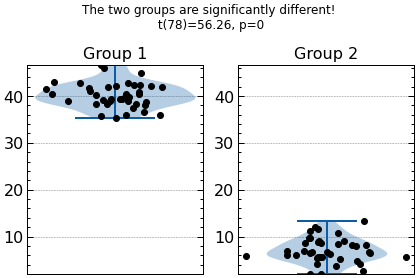

In [4]:
## this section is for data visualization (don't need to modify)

fig,ax = plt.subplots(1,2,figsize=(6,4))

ax[0].violinplot(data_group1)
ax[0].plot(1+np.random.randn(samples_group1)/10,data_group1,'ko')
ax[0].set_ylim(datalims)
ax[0].axes.get_xaxis().set_visible(False)
ax[0].set_title('Group 1')

ax[1].violinplot(data_group2)
ax[1].plot(1+np.random.randn(samples_group2)/10,data_group2,'ko')
ax[1].set_ylim(datalims)
ax[1].axes.get_xaxis().set_visible(False)
ax[1].set_title('Group 2')

# 2-group t-test
t,p = stats.ttest_ind(data_group1,data_group2)

# print the information to the title
sigtxt = ('',' NOT')
plt.suptitle('The two groups are%s significantly different!\n t(%g)=%g, p=%g'%(sigtxt[int(p>.05)],sum(ns)-2,np.round(t,2),np.round(p,3)))

plt.tight_layout()

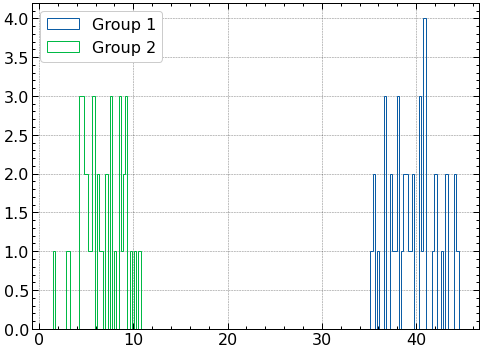

In [5]:
plt.hist(pd.DataFrame(np.random.randn(samples_group1)*standard_deviation + average_group1),bins=40, histtype='step', label='Group 1')
plt.hist(pd.DataFrame(np.random.randn(samples_group2)*standard_deviation + average_group2),bins=40, histtype='step', label='Group 2')
plt.legend()
plt.show()

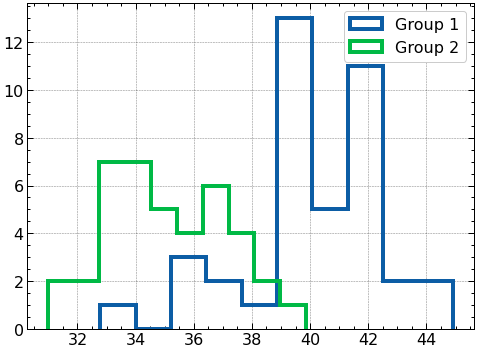

In [6]:
plt.hist(pd.DataFrame(np.random.randn(samples_group1)*standard_deviation + average_group1),lw=4,bins=10, histtype='step', label='Group 1')
plt.hist(pd.DataFrame(np.random.randn(samples_group2)*standard_deviation + 35),bins=10, lw=4, histtype='step', label='Group 2')
plt.legend()
plt.show()

# 2. One-sample t-test

- Data are randomly drawn from the population to which generalization should be made.
- Meand and standard deviation are valid descriptors of central tendency and dispersion.

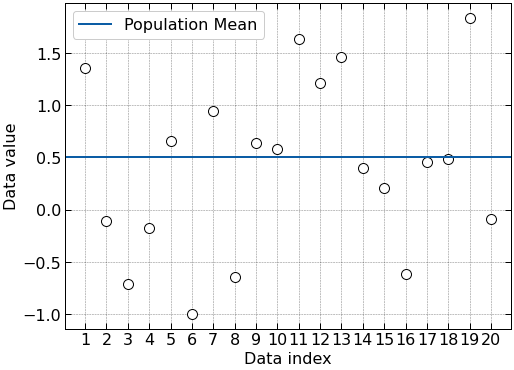

In [7]:
## generate the data

# parameters
N = 20  # sample size
popMu = .5 # true population mean
data  = np.random.randn(N) + popMu

# let's see what the data look(s) like
plt.plot(np.arange(1, N+1), data,'ko',markerfacecolor='w',markersize=10)
plt.xlabel('Data index')
plt.xticks(np.arange(1, N+1))
plt.minorticks_off()
plt.axhline(popMu, label='Population Mean')
plt.ylabel('Data value')
plt.legend()
plt.show()

$$
t_{cal}=\frac{\left(\overline x-\mu\right)}{\displaystyle\frac s{\sqrt n}}
$$

$$
H_0:\;\mu-\overline x=\;0\;\\H_a:\;\mu-\overline x\neq\;0\;
$$

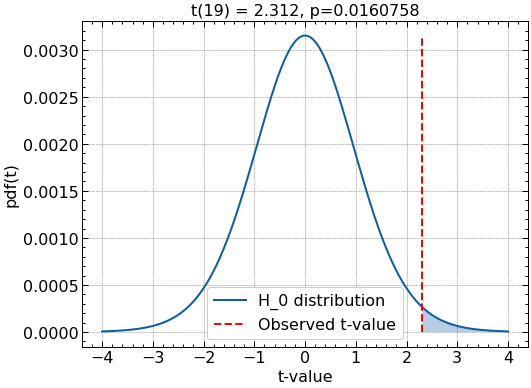

In [8]:
## "manual" t-test

# the null-hypothesis value
H0val = 0

# compute the t-value
t_num = np.mean(data) - H0val
t_den = np.std(data, ddof=1) / np.sqrt(N)
tval = t_num / t_den

# degrees of freedom
df = N-1

# p-value
pval = 1-stats.t.cdf(abs(tval),df)

# show the H0 parameter distribution and observed t-value
x = np.linspace(-4,4,1001)
tdist = stats.t.pdf(x,df) * np.diff(x)[0]

plt.plot(x,tdist,linewidth=2)
plt.plot([tval,tval],[0,max(tdist)],'r--')
plt.legend(('H_0 distribution','Observed t-value'))
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g) = %g, p=%g'%(df,tval,pval))
plt.fill_between(x,tdist, 0, where=(x>tval), alpha=0.3)
plt.show()

In [9]:
## now using the Python function

t,p = stats.ttest_1samp(data,H0val) #two tailed p=1/2

print(t,p/2)#one tailed

2.3119960778509636 0.016075821384467597


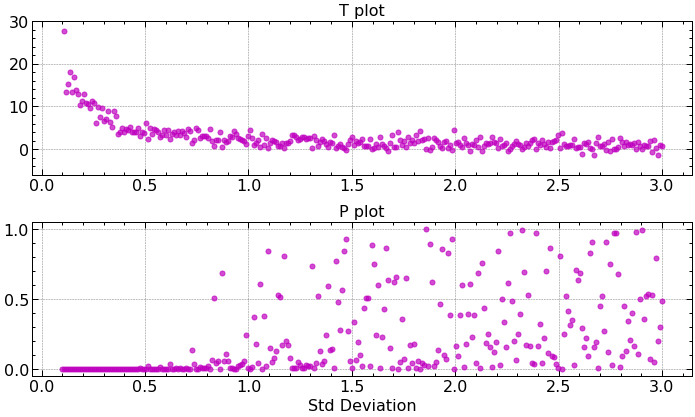

In [10]:
N = 20
popMu = .5
stds = np.linspace(0.1, 3, 301)
H0val = 0
 
## Initialize
data = np.zeros((N,len(stds)))
for i in range(len(stds)):
    data[:,i] = stds[i]*np.random.randn(N) + popMu
    
 
t_vals = np.zeros(len(stds))
p_vals = np.zeros(len(stds))
 
for j in range(len(stds)):
    t_vals[j], p_vals[j] = stats.ttest_1samp(data[:,j], H0val)
    
    
## Plot the results
fig, ax = plt.subplots(2,1,figsize=(10,6))
 
ax[0].plot(stds, t_vals, "mo", ms=5, alpha=0.7)
ax[0].set_ylim(-6,30)
ax[0].set_title("T plot")
plt.tight_layout()
 
ax[1].plot(stds, p_vals, "mo", ms=5, alpha=0.7)
ax[1].set_title("P plot")
ax[1].set_xlabel("Std Deviation")
plt.tight_layout();

In [11]:
pd.DataFrame(data).tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
15,0.539067,0.467873,0.930096,0.637502,0.623295,0.559138,0.508217,0.185934,0.451481,0.111331,...,-3.074141,2.731481,1.937669,2.105448,-3.008764,2.693103,-7.146418,-0.952949,3.958580,3.318180
16,0.413454,0.473400,0.627506,0.355200,0.506782,0.583944,0.629560,0.438040,0.827736,0.669428,...,-4.388948,5.093375,-1.992920,4.053371,-5.150696,2.406436,-8.232926,-5.153660,1.115885,1.617638
17,0.648797,0.610584,0.437349,0.231233,0.442362,0.411145,0.590814,0.702180,0.630671,0.435382,...,2.897140,0.342156,3.923458,2.376045,3.996023,0.706146,-0.604378,0.492906,0.398087,0.191406
18,0.695499,0.511985,0.516328,0.470639,0.432309,0.442601,0.647889,0.478358,0.380209,0.483009,...,-4.097074,-0.937862,-0.045510,-1.372523,1.154956,1.163514,1.361027,-2.550023,-1.600414,-5.420932
19,0.475623,0.571243,0.545275,0.786086,0.606944,0.388881,0.711752,0.488006,0.436594,0.208806,...,-0.443422,-3.330604,4.475306,1.891381,-1.966095,3.575148,-0.828210,0.968528,-3.076284,0.593233


Text(0, 0.5, 'P values')

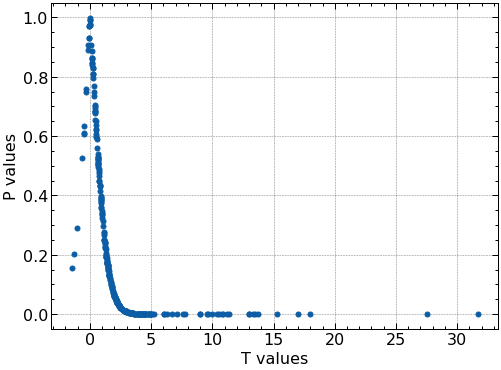

In [12]:
plt.tight_layout()
plt.plot(t_vals, p_vals, "o", ms=5)
plt.xlabel("T values")
plt.ylabel("P values")

# 3. Two-samples t-test


- **Paired or unpaired**: Whether the two groups of data are drawn from the same or different individuals
- **Equal or unequal variance**: Whether the two groups have (roughly) equal variance
- **Equal or unequal sample sizes**: Whether the two groups have have the same number of values (applies only to unpaired groups)

### Roughly the same data

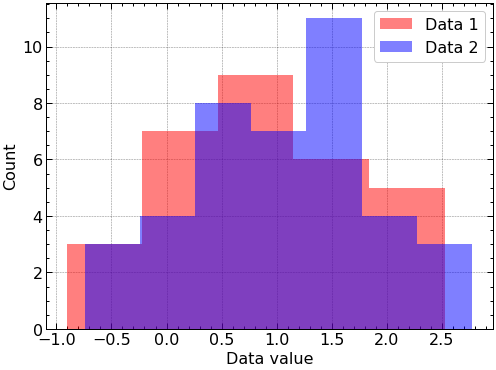

In [13]:
## generate the data

# parameters
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1  # population mean in dataset 1
mu2 = 1.2 # population mean in dataset 2


# generate the data with EQUAL VARIANCE
data1 = mu1 + np.random.randn(n1)
data2 = mu2 + np.random.randn(n2)

# show their histograms
plt.hist(data1,bins='fd',color=[1,0,0,.5],label='Data 1') #R,G,B, alpha
plt.hist(data2,bins='fd',color=[0,0,1,.5],label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [14]:
## now for the t-test

t,p = stats.ttest_ind(data1,data2,equal_var=True)

df = n1+n2-2
print('t(%g) = %g, p=%g'%(df,t,p))

t(68) = -0.774799, p=0.441144


### Squeezing the variance of original data

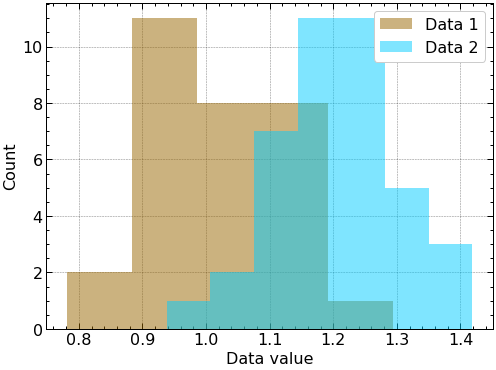

In [15]:
## generate the data

# parameters
n1 = 30   # samples in dataset 1
n2 = 40   # ...and 2
mu1 = 1  # population mean in dataset 1
mu2 = 1.2 # population mean in dataset 2


# generate the data with EQUAL VARIANCE
data1 = mu1 + np.random.randn(n1)/10
data2 = mu2 + np.random.randn(n2)/10

# show their histograms
plt.hist(data1,bins='fd',color=[0.6,0.4,0,.5],label='Data 1') #R,G,B, alpha
plt.hist(data2,bins='fd',color=[0,0.8,1,.5],label='Data 2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.legend()
plt.show()

In [16]:
t,p = stats.ttest_ind(data1,data2,equal_var=True) #unpaired test (ind), equal variance

df = n1+n2-2
print('t(%g) = %g, p=%g'%(df,t,p))

t(68) = -8.13486, p=1.24676e-11


### Effect of variance and mean differences

$$
H_0:\mu_1=\mu_2\\H_a:\mu_1\neq\mu_2
$$


$$
t_{cal}=\frac{{\overline x}_1-{\overline x}_2}{s_p\sqrt{{\displaystyle\frac1{n_1}}+{\displaystyle\frac1{n_2}}}}
$$

$$
s_p^2=\frac{(n_1-1)s_1^2\;+\;(n_2-1)s_2^2}{df}
$$

$$
df=n_1-1+n_2-1
$$

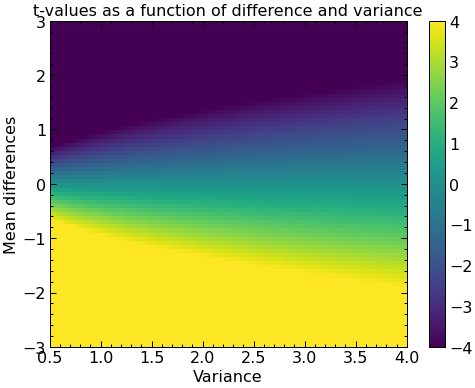

In [17]:
## a 2D space of t values 

# ranges for t-value parameters
meandiffs = np.linspace(-3,3,80)
pooledvar = np.linspace(.5,4,100)

# group sample size
n1 = 40
n2 = 30

# initialize output matrix
allTvals = np.zeros((len(meandiffs),len(pooledvar)))

# loop over the parameters...
for meani in range(len(meandiffs)):
    for vari in range(len(pooledvar)):
        
        # t-value denominator
        df = n1 + n2 - 2
        s  = np.sqrt(( (n1-1)*pooledvar[vari] + (n2-1)*pooledvar[vari]) / df)
        t_den = s * np.sqrt(1/n1 + 1/n2)
        
        # t-value in the matrix
        allTvals[meani,vari] = meandiffs[meani] / t_den

        
plt.imshow(allTvals,vmin=-4,vmax=4,extent=[pooledvar[0],pooledvar[-1],meandiffs[0],meandiffs[-1]],aspect='auto')
plt.xlabel('Variance')
plt.ylabel('Mean differences')
plt.grid(False)
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('t-values as a function of difference and variance')
plt.show()

The goal of this challenge is to explore the role of sample size on the t-test. You simulate data from two conditions with the same variance and means, but different sample sizes. What you will observe is that even though the population characteristics do not change, simply having a larger sample size gives a larger t-value, which means larger chance of finding a statistically significant result.

### Effect of sample size in equal variance t-test

C:\Users\Kevin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


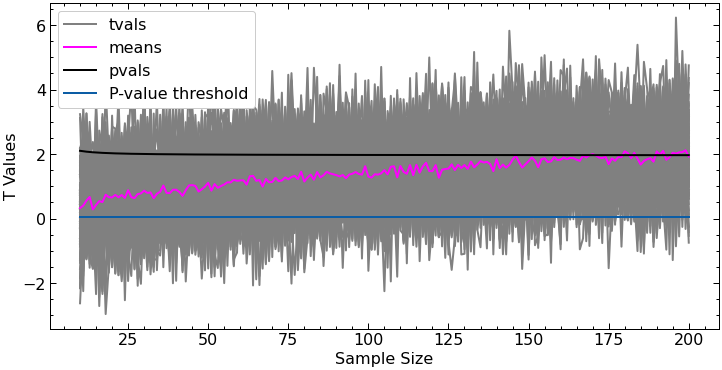

In [18]:
sample_size = np.arange(10,201)
mean1 = 1
mean2 = 1.2
num_exps = 100
pval_thresh = 0.05
 
tvals = np.zeros((num_exps, len(sample_size)))
pvals = np.zeros(len(sample_size))
 
for i in range(num_exps):
    for j,k  in enumerate(sample_size):
        data1= mean1 + np.random.randn(k)
        data2= mean2 + np.random.randn(k)
        tvals[i,j] = stats.ttest_ind(data2,data1,equal_var=True)[0]
        df = len(data1)+len(data2)-2
        pvals[j] = stats.t.ppf(1-pval_thresh/2, df)
        
        
fig, ax = plt.subplots(figsize=(12,6))
 
ax.plot(sample_size, tvals.T, color='gray', label='tvals')
ax.plot(sample_size,tvals.mean(axis=0), color='magenta', label='means')
ax.plot(sample_size,pvals, color='black', label='pvals')
ax.plot([sample_size[0], sample_size[-1]], [pval_thresh,pval_thresh], label='P-value threshold')
#remove duplicate labels
def legend_without_duplicate_labels(ax):
     handles, labels = ax.get_legend_handles_labels()
     unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
     ax.legend(*zip(*unique))
legend_without_duplicate_labels(ax)
 
ax.set_xlabel('Sample Size')
ax.set_ylabel('T Values')
plt.grid(False)
plt.show()

In [19]:
pd.DataFrame(tvals.T)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.774290,3.236015,3.117886,0.553323,-0.125653,-1.278202,0.702772,-0.682940,0.424413,0.419258,...,-0.251378,1.649177,0.749025,0.467948,1.375969,0.634922,0.366243,-1.215404,0.307455,0.272370
1,0.795194,2.389969,0.157600,-0.308944,-0.127993,-0.456096,-0.514448,-0.266214,0.245811,0.173660,...,0.752994,0.048554,1.113294,2.332996,2.041755,-0.134399,-0.282466,-0.020668,-0.036491,0.051969
2,0.420574,0.933087,0.943589,1.915842,0.768322,0.846181,0.653017,-0.052792,0.440686,0.597895,...,1.128096,1.145647,2.844333,1.779309,0.586551,-0.928853,0.970805,1.636571,0.811609,0.188530
3,-1.301812,0.090544,0.695464,-1.406829,-0.424374,1.659469,0.864870,0.026893,1.550089,1.803031,...,2.673218,1.842453,0.754527,1.408637,0.251133,0.957389,2.639064,-0.482383,-0.401012,1.463876
4,0.807128,0.363757,0.267774,0.981292,0.418799,0.047662,0.336075,-0.848944,0.202924,1.040874,...,0.035935,0.816599,1.820925,-0.035730,1.881333,-0.026876,-0.202299,-0.370845,0.318267,-0.832659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.214536,1.723361,1.874382,0.581110,2.311869,2.182195,1.675162,2.610849,1.364609,1.643067,...,1.843929,2.859284,4.902090,2.261893,3.154643,0.986747,1.102078,1.732783,1.002357,-0.271035
187,3.159096,2.879742,1.827914,2.853342,2.507112,2.680906,0.767262,1.679483,1.686400,1.044336,...,1.675499,2.085877,1.963470,0.977350,2.037627,1.112170,2.380172,2.008073,4.461218,2.614465
188,3.683219,1.375741,0.665609,1.327730,2.265738,2.778142,2.165719,0.777771,0.145629,0.565480,...,2.215725,0.811247,2.314612,3.113557,1.695058,3.456374,0.909986,2.620230,2.618270,3.807560
189,0.410862,2.628439,2.871357,2.820682,2.549587,2.402830,1.866526,2.928522,2.378636,4.144300,...,1.699451,2.140802,2.959841,2.105106,2.339417,1.058117,0.608028,3.308893,-0.321613,2.882088


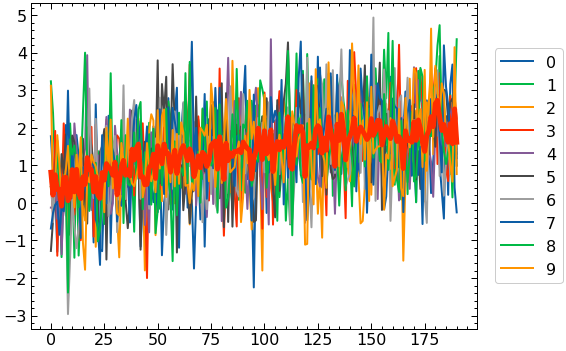

In [20]:
pd.DataFrame(tvals.T).iloc[:,:10].plot()
plt.plot(pd.DataFrame(tvals.T).iloc[:,:10].mean(axis=1), lw=5)
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0)

# 4. Signed-rank test (Wilcoxon signed-rank for one-sample or paired samples)

- Non parametric alternative to the one- or two- sample t-test. 
- Mainly used to the data that don't conform the normality assumption.
- Test for differences in medians instead of differences in means (median is insensitive to outliers)

**Median t-tests**
- Wilcoxonn signed-rank test: One-sample & two dependent (paired) samples
- Mann-Whitney U test: Two independent samples

In [21]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

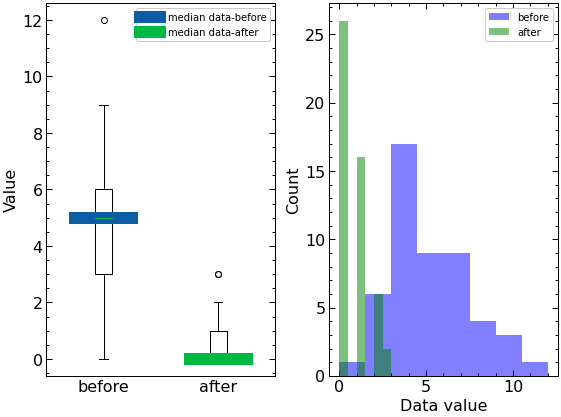

In [22]:
## generate the data

N = 50

data1 = np.random.poisson(5,N)
data2 = np.random.poisson(1,N)
fig, ax=plt.subplots(1, 2)
ax[0].boxplot([data1,data2])
ax[0].set_xticks([1,2], ['before', 'after'])
ax[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0].plot([1-0.25,1+0.25], [np.median(data1),np.median(data1)], lw=12, label='median data-before')
ax[0].plot([2-0.25,2+0.25], [np.median(data2),np.median(data2)], lw=12, label='median data-after')
ax[0].legend(fontsize=10, title_fontsize=15)
ax[0].set_ylabel('Value')

ax[1].hist(data1,bins='fd',color='blue',label='before', histtype='stepfilled', alpha=0.5) 
ax[1].hist(data2,bins='fd',color='green',label='after', histtype='stepfilled', alpha=0.5)
ax[1].set_xlabel('Data value')
ax[1].set_ylabel('Count')
ax[1].legend(fontsize=10, title_fontsize=15)
plt.tight_layout()

plt.show()

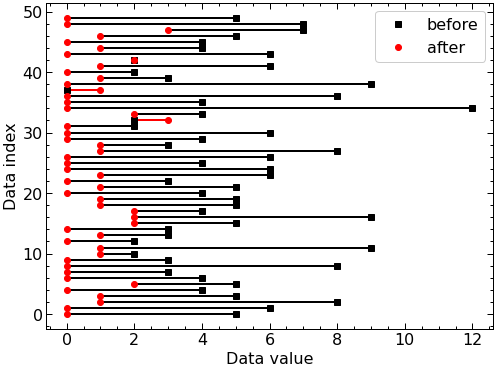

In [23]:
colors = 'kr'
for i in range(N):
    plt.plot([data1[i], data2[i]],[i, i],colors[int(data1[i]<data2[i])])

plt.plot(data1,np.arange(N),'ks',markerfacecolor='k',label='before')
plt.plot(data2,np.arange(N),'ro',markerfacecolor='r',label='after')

plt.ylabel('Data index')
plt.xlabel('Data value')
plt.legend()


In [24]:
## now for the test

t,p = stats.wilcoxon(data1,data2)
print('Wilcoxon z=%g, p=%g'%(t,p))

Wilcoxon z=4, p=1.24998e-09


C:\Users\Kevin\anaconda3\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\Kevin\anaconda3\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


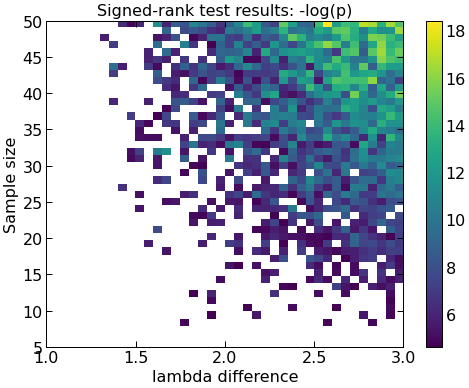

In [25]:
## now for the 2D space

# parameter ranges
Ns = np.arange(5,51) #46 ROWS
lambdas = np.linspace(1,3,40) #40 COLUMNS

# initialize output matrix
pvals = np.zeros((len(Ns),len(lambdas)))

for ni in range(len(Ns)):
    for li in range(len(lambdas)):
        
        # generate some data
        data1 = np.random.poisson(lambdas[0], Ns[ni]) # FIXED LAMBDA for data1 (1)
        data2 = np.random.poisson(lambdas[li],Ns[ni]) # V(1 to 40)
        
        # compute the statistic
        t,p = stats.wilcoxon(data1,data2)
        
        # store the results
        pvals[ni,li] = -np.log(p)
        

# optional p-value thresholding
pvalthresh = .01
pvals[ pvals<-np.log(pvalthresh) ] = np.NaN


# now show in a heatmap!
plt.imshow(pvals,origin='lower',extent=[lambdas[0],lambdas[-1],Ns[0],Ns[-1]],aspect='auto')
plt.xlabel('lambda difference')
plt.ylabel('Sample size')
plt.title('Signed-rank test results: -log(p)')
plt.grid(False)
plt.minorticks_off()
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.show()

In [26]:
pd.DataFrame(pvals).tail()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.349038,9.414216,6.888779,14.061865,14.684128,8.611809,14.822158,16.418004,13.838867,15.255929
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.07804,NaN,NaN,...,14.397159,16.176403,14.752657,10.520656,14.166922,9.445400,12.741484,16.160267,13.438273,14.024563
43,NaN,NaN,NaN,NaN,NaN,NaN,5.708517,NaN,NaN,NaN,...,11.221373,10.231694,12.116215,14.595372,13.133059,11.554657,15.692195,15.398214,13.991184,12.497033
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.018241,12.005066,14.855483,15.015871,13.363842,10.280201,13.057672,11.460376,11.633440,16.454177
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.360372,4.776102,...,14.133886,18.407782,12.216786,14.137706,13.754010,17.071654,16.617398,13.365945,16.500890,14.582404


# 5. Mann-Whitney U test

- Nonparametric alternative to the independent two-samples t-test (Unpaired)
- The data don't conform to the normality assumption
- Two groups do not need to have the same sample size

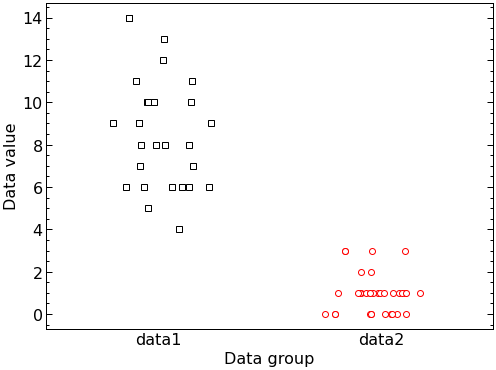

In [27]:
## generate the data

# the data (note the different sample sizes)
N1 = 30
N2 = 35

data1 = np.random.poisson(9,N1)
data2 = np.random.poisson(1,N2)

plt.plot(1+np.random.randn(N1)/10,data1,'ks',markerfacecolor='w')
plt.plot(2+np.random.randn(N2)/10,data2,'ro',markerfacecolor='w')

plt.xlim([0.5,2.5])
plt.xticks([1,2],labels=('data1','data2'))
plt.xlabel('Data group')
plt.ylabel('Data value')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.show()

In [28]:
## now for the test

U,p = stats.mannwhitneyu(data1,data2)

print(U,p)

1050.0 2.5316364172779704e-12


# 6. Permutation testing


- No assumption for $H_0$ distribution (non-analytic distributioon)
- Based on empirical  $H_0$ distribution (shuffled and reassigned data)
$$
statistic\;value_{shuffled}=\frac1{n_a}\underset{a_{shuffled}}{\sum x_a}-\frac1{n_b}\underset{b_{shuffled}}{\sum x_b}
$$
- Two groups do not need to have the same sample size
- No need to worry about $df$
- Statistic value of original data against distribution of statistic value of shuffled and reassigned data
- Probability based on counts (be careful of which tail)
$$
p\;value_{shuffled}=\frac{\sum_{}(H_0>statistic\;value_{original})}{N_{H_0}}
$$


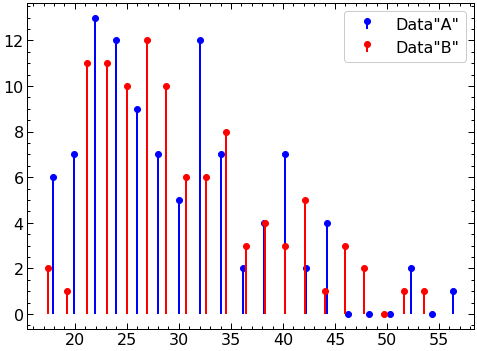

In [29]:
## simulate two distributions

# number of trials
N = 100

# dataset "A"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 29-r*10

# get histogram values for later comparison
yA,xA = np.histogram(dataA,20)
xA = (xA[:-1]+xA[1:])/2

# dataset "B"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

#get histogram values for later comparison
yB,xB = np.histogram(dataB,20)
xB = (xB[:-1]+xB[1:])/2


plt.stem(xA,yA,linefmt='b', markerfmt='bo',basefmt=' ',label='Data"A"')
plt.stem(xB,yB,linefmt='red', markerfmt='ro',basefmt=' ',label='Data"B"')
plt.legend()
plt.show()

In [30]:
## mix trials together

# concatenate trials
alldata = np.hstack((dataA,dataB))

# condition labels
conds = np.hstack((np.ones(N),2*np.ones(N)))
## generate one null hypothesis scenario

# random permutation
fakeconds = np.random.permutation(N*2)

# shuffled condition labels
fakeconds[fakeconds<N] = 1
fakeconds[fakeconds>1] = 2


# these two means should be different.
print([np.mean(alldata[conds==1]), np.mean(alldata[conds==2])])

# should these two be different?
print([np.mean(alldata[fakeconds==1]), np.mean(alldata[fakeconds==2])])

[29.597991124395552, 30.310286140080073]
[29.620876117056433, 30.287401147419192]


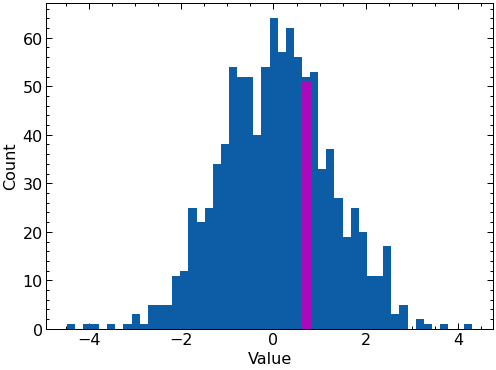

In [31]:
## and now a distribution of null hypothesis values

nPerms = 1000
permdiffs = np.zeros(nPerms)

for permi in range(nPerms):
    fconds = np.random.permutation(N*2)
    fconds[fconds<N] = 1
    fconds[fconds>1] = 2
    permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])


# plot the distribution of H0 values
plt.hist(permdiffs,50)

# and plot the observed value on top
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])
plt.plot([obsval, obsval],[0, 50],'m',linewidth=10, alpha=0.9)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [32]:
## two methods of evaluating statistical significance

# Z-value
zVal = ( obsval-np.mean(permdiffs) ) / np.std(permdiffs,ddof=1)
p = 1-stats.norm.cdf(abs(zVal))

# p-value count
pCount = sum(permdiffs>obsval)/nPerms

print(p,pCount)

0.2924025710368814 0.29


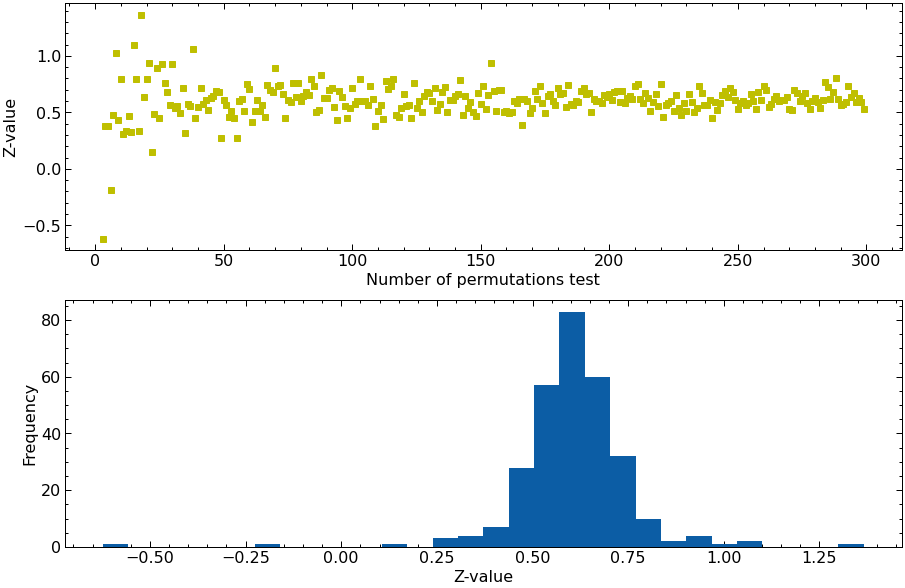

In [33]:
nPerms =np.arange(3,300)
zVal= np.zeros(len(nPerms))
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])
for idx,_ in enumerate(nPerms):
    permdiffs = np.zeros(nPerms[idx])
    for permi in range(nPerms[idx]):
        fconds = np.random.permutation(N*2)
        fconds[fconds<N] = 1
        fconds[fconds>1] = 2
        permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])
    zVal[idx] = ( obsval-np.mean(permdiffs) ) / np.std(permdiffs,ddof=1)
 
fig,ax = plt.subplots(nrows=2,figsize=(15,10))
ax[0].plot(nPerms,zVal, 'ys')
ax[0].set_xlabel('Number of permutations test')
ax[0].set_ylabel('Z-value')
 
ax[1].hist(zVal,bins=30)
ax[1].set_xlabel('Z-value')
ax[1].set_ylabel('Frequency');

# 7. Compute confidence intervals by formula

- The probability that an unknown populaton parameter falls within a range of values in repeated samples
- $$P\left(L<\mu<U\right)=C.I.$$
- The proportion of a large number of samples that will incluide the population parameter within its confidence interval
- When the sample size is larger, confidence intervals are closer together
- When the variance is smaller, confidence intervals are closser together
- Interpretation: "95% OF **confidence intervals in repeated samples** will contain the true population mean."

- $$
C.I.\ =\bar{x}\pm t^\ast(df)\frac{s}{\sqrt n}
$$

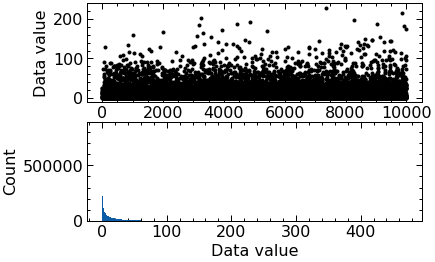

In [34]:
## simulate data

popN = int(1e7)  # lots and LOTS of data!!

# the data (note: non-normal!)
population = (4*np.random.randn(popN))**2

# we can calculate the exact population mean
popMean = np.mean(population)

# let's see it
fig,ax = plt.subplots(2,1,figsize=(6,4))

# only plot every 1000th sample
ax[0].plot(population[::1000],'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value')
plt.show()

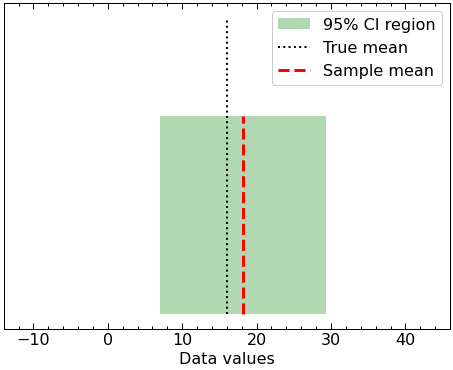

In [35]:
## draw a random sample

# parameters
samplesize = 40
confidence = 95 # in percent

# compute sample mean
randSamples = np.random.randint(0,popN,samplesize)
samplemean  = np.mean(population[randSamples])
samplestd   = np.std(population[randSamples],ddof=1)

# compute confidence intervals
citmp = (1-confidence/100)/2
confint = samplemean + stats.t.ppf([citmp, 1-citmp],samplesize-1) * samplestd/np.sqrt(samplesize)

# graph everything
fig,ax = plt.subplots(1,1)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popMean,popMean],[0, 1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0, 1],'r--',linewidth=3)
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('%g%% CI region'%confidence,'True mean','Sample mean',))
plt.show()

In [36]:
## repeat for large number of samples

# parameters
samplesize = 50
confidence = 95  # in percent
numExperiments = 5000

withinCI = np.zeros(numExperiments)


# part of the CI computation can be done outside the loop
citmp = (1-confidence/100)/2
CI_T  = stats.t.ppf([citmp, 1-citmp],samplesize-1)
sqrtN = np.sqrt(samplesize)

for expi in range(numExperiments):
    
    # compute sample mean and CI as above
    randSamples = np.random.randint(0,popN,samplesize)
    samplemean  = np.mean(population[randSamples])
    samplestd   = np.std(population[randSamples],ddof=1)
    confint     = samplemean + CI_T * samplestd/sqrtN
    
    # determine whether the True mean is inside this CI
    if popMean>confint[0] and popMean<confint[1]:
        withinCI[expi] = 1
        

print('%g%% of sample C.I.''s contained the true population mean.'%(100*np.mean(withinCI)))

92.22% of sample C.I.s contained the true population mean.


# 8. Bootstrapping confidence intervals

- Instead of using formula, we will compute C.I. based on the data
- Repeatedly randomly resampling from the dataset
- Pretend your sample is the population, and the resampling is the sample

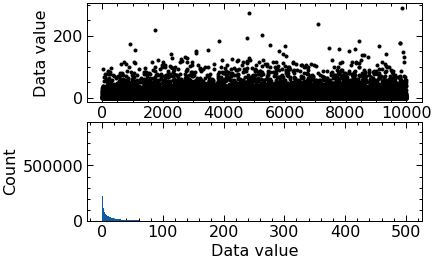

In [37]:
## simulate data

popN = int(1e7)  # lots and LOTS of data!!

# the data (note: non-normal!)
population = (4*np.random.randn(popN))**2

# we can calculate the exact population mean
popMean = np.mean(population)

# let's see it
fig,ax = plt.subplots(2,1,figsize=(6,4))

# only plot every 1000th sample
ax[0].plot(population[::1000],'k.')
ax[0].set_xlabel('Data index')
ax[0].set_ylabel('Data value')

ax[1].hist(population,bins='fd')
ax[1].set_ylabel('Count')
ax[1].set_xlabel('Data value')
plt.show()

In [38]:
## draw a random sample

# parameters
samplesize = 40
confidence = 95 # in percent

# compute sample mean
randSamples = np.random.randint(0,popN,samplesize)
sampledata  = population[randSamples]
samplemean  = np.mean(population[randSamples])
samplestd   = np.std(population[randSamples]) # used later for analytic solution



### now for bootstrapping
numBoots  = 1000
bootmeans = np.zeros(numBoots)

# resample with replacement
for booti in range(numBoots):

    bootmeans[booti] = np.mean( np.random.choice(sampledata,samplesize) )#Resampling with replacement

# find confidence intervals
confint = [0,0] # initialize
confint[0] = np.percentile(bootmeans,(100-confidence)/2)
confint[1] = np.percentile(bootmeans,100-(100-confidence)/2)

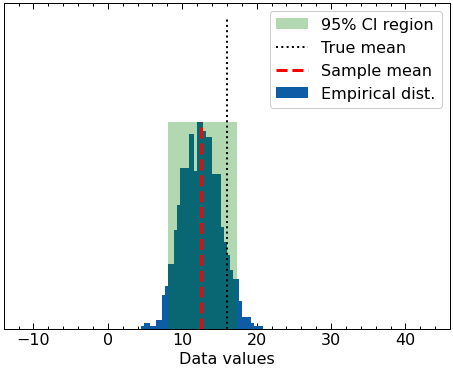

In [39]:
## graph everything
fig,ax = plt.subplots(1,1)

# start with histogram of resampled means
y,x = np.histogram(bootmeans,40)
y = y/max(y)
x = (x[:-1]+x[1:])/2
ax.bar(x,y)

y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.3)
ax.add_patch(p)

# now add the lines
ax.plot([popMean,popMean],[0, 1.5],'k:',linewidth=2)
ax.plot([samplemean,samplemean],[0, 1],'r--',linewidth=3)
ax.set_xlim([popMean-30, popMean+30])
ax.set_yticks([])
ax.set_xlabel('Data values')
ax.legend(('%g%% CI region'%confidence, 'True mean','Sample mean','Empirical dist.'))
plt.show()

In [40]:
## compare against the analytic confidence interval

# compute confidence intervals
citmp = (1-confidence/100)/2
confint2 = samplemean + stats.t.ppf([citmp, 1-citmp],samplesize-1) * samplestd/np.sqrt(samplesize)

print('Empirical: %g - %g'%(confint[0],confint[1]))
print('Analytic:  %g - %g'%(confint2[0],confint2[1]))

Empirical: 8.04774 - 17.3659
Analytic:  7.54195 - 17.4523


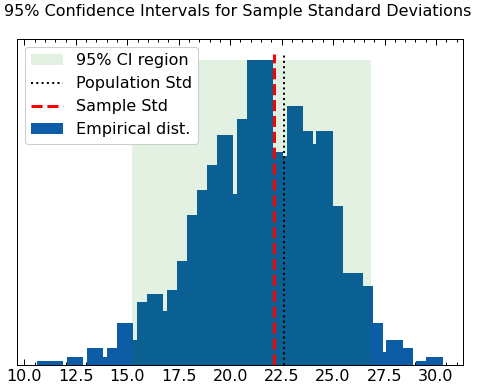

In [41]:
 
## simulate data
 
popN = int(1e7)  # lots and LOTS of data!!
 
# the data (note: non-normal!)
population = (4*np.random.randn(popN))**2
 
# we can calculate the exact population std
popStd = np.std(population)
 
## draw a random sample
 
# parameters
samplesize = 40
confidence = 95 # in percent
 
# compute sample std
randSamples = np.random.randint(0,popN,samplesize)
sampledata  = population[randSamples]
samplestd   = np.std(population[randSamples],ddof=1) # used later for analytic solution
 
 
 
### now for bootstrapping
numBoots  = 1000
bootstd = np.zeros(numBoots)
 
# resample with replacement
for booti in range(numBoots):
    bootstd[booti] = np.std( np.random.choice(sampledata,samplesize),ddof=1)
    
 
# find confidence intervals
confint = [0,0] # initialize
confint[0] = np.percentile(bootstd,(100-confidence)/2)
confint[1] = np.percentile(bootstd,100-(100-confidence)/2)
 
## graph everything
 
fig,ax = plt.subplots(1,1,figsize=(8,6))
 
# start with histogram of resampled std
y,x = np.histogram(bootstd,40)
y = y/max(y)
x = (x[:-1]+x[1:])/2
ax.bar(x,y)
 
y = np.array([ [confint[0],0],[confint[1],0],[confint[1],1],[confint[0],1] ])
p = Polygon(y,facecolor='g',alpha=.11)
 
ax.add_patch(p)
 
# now add the lines
ax.plot([popStd,popStd],[0, 1.02],'k:',linewidth=2)
ax.plot([samplestd,samplestd],[0, 1.02],'r--',linewidth=3)
 
 
ax.set_title("95% Confidence Intervals for Sample Standard Deviations \n")
ax.set_yticks([])
 
ax.legend(('%g%% CI region'%confidence, 'Population Std','Sample Std','Empirical dist.'))
 
plt.show()


 # 9. Correlation coefficient (Pearson)

- Shows the **LINEAR** relationship between two variables
- Varies between -1 to 1
- Continuous measure of correlation strength
- A corresponidng p-value must be computed to interpret its statistical significance
- It does not reveal or imply causality
- Correlation is the scaled covariance

$$
cov=\frac1{n-1}\sum_{i=1}^n\left(x_i-\overline x\right)\left(y_i-\overline y\right)
$$

$$
corr=\frac{\sum_{i=1}^n\left(x_i-\overline x\right)\left(y_i-\overline y\right)}{\sqrt{\sum_{i=1}^n\left(x_i-\overline x\right)^2\sum_{i=1}^n\left(y_i-\overline y\right)^2}}
$$

- Statistical significance is computed from a t-value

$$
t_{n-2}=\frac{corr\sqrt{n-2}}{1-corr^2}
$$

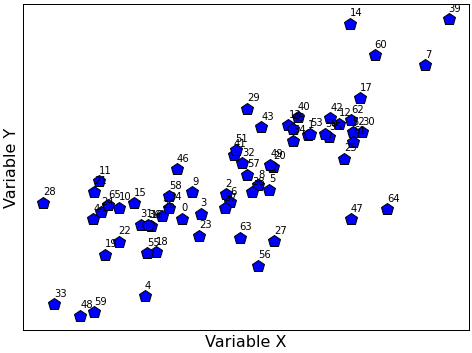

In [23]:
# simulate data

N = 66

# generate correlated data
x = np.random.randn(N)
y = x + np.random.randn(N)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])

for i in range(N):
    plt.text(x[i], y[i]+0.05*(np.max(y)), str(i))
    
plt.show()

In [55]:
#compute covariance

# precompute the means
meanX = np.mean(x)
meanY = np.mean(y)

### (1) THE LOOP METHOD
covar1 = 0
for i in range(N):
    covar1 = covar1 + (x[i]-meanX)*(y[i]-meanY)
    

# and now for the normalization
covar1 = covar1/(N-1)

### (2) THE LINEAR ALGEBRA METHOD
xCent = x-meanX
yCent = y-meanY
covar2 = np.dot(xCent,yCent) / (N-1)

### (3) THE PYTHON METHOD
covar3 = np.cov(np.vstack((x,y)))

print(covar1,covar2,covar3, sep='\n')

1.2296379476414039
1.2296379476414037
[[1.01045266 1.22963795]
 [1.22963795 2.60965179]]


In [56]:
## now for correlation

### THE LONG METHOD
corr_num = sum( (x-meanX) * (y-meanY) )
corr_den = sum((x-meanX)**2) * sum((y-meanY)**2)
corr1 = corr_num/np.sqrt(corr_den)


### THE PYTHON METHOD
corr2 = np.corrcoef(np.vstack((x,y)))

print(corr1, corr2, sep='\n')

0.7572303130146277
[[1.         0.75723031]
 [0.75723031 1.        ]]


$$
z=\frac{x-\overline x}s
$$

In [57]:
## correlation as normalized covariance

xn = stats.zscore(x,ddof=1)
yn = stats.zscore(y,ddof=1)

corr3 = np.dot(xn,yn) / (N-1)

print(corr3)

0.7572303130146278


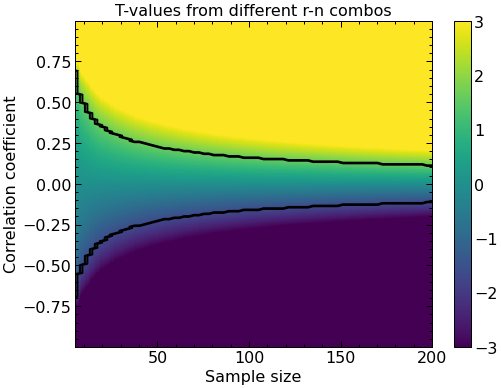

In [37]:
## 2D t-value space based on r and n

# define parameters
r = np.linspace(-0.999,0.999,248)
n = np.round( np.linspace(5,200,73) )

# initialize t-value matrix
tmatrix = np.zeros((len(r),len(n)))
pmatrix = np.zeros((len(r),len(n)))

for ri in range(len(r)):
    for ni in range(len(n)):
        
        # the t-value, split into num/den
        num = r[ri]*np.sqrt(n[ni]-2)
        den = 1-r[ri]**2
        
        tmatrix[ri,ni] = num/den
        pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)

        
        
# Soooo curious to see it!
plt.imshow(tmatrix,vmin=-3,vmax=3,extent=[n[0],n[-1],r[0],r[-1]],aspect='auto',origin='lower')
plt.contour(pmatrix<.05,1,colors='k',extent=[n[0],n[-1],r[0],r[-1]])
plt.grid()
plt.xlabel('Sample size')
plt.ylabel('Correlation coefficient')
plt.title('T-values from different r-n combos')
plt.show()

#Above black line: significant, p < 0.05

In [47]:
# final note on statistical significance

r,p = stats.pearsonr(x,y)
print(r,p)


0.7466758521849753 6.128975446140473e-13


# 10. Simulate data with specified correlation

$$
y=x\ast corr+y\sqrt{1-\ {\rm corr}^2}
$$

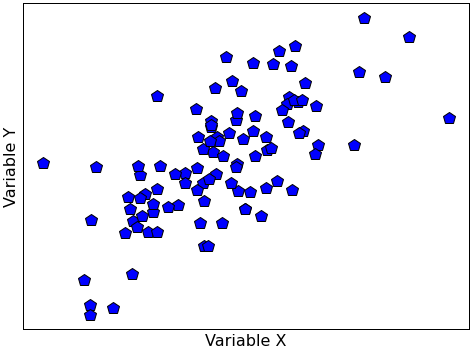

In [22]:
## simulate data

# data simulation parameters
N = 100  # number of samples
r = .6   # desired correlation coefficient

# start with random numbers
x = np.random.randn(N)
y = np.random.randn(N)

# impose the correlation on y
y = x*r + y*np.sqrt(1-r**2)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [49]:
## compute the empirical correlation

empR = np.corrcoef(x,y)

print('Desired r=%g, empirical r=%g'%(r,empR[0,1]))

Desired r=0.6, empirical r=0.530463


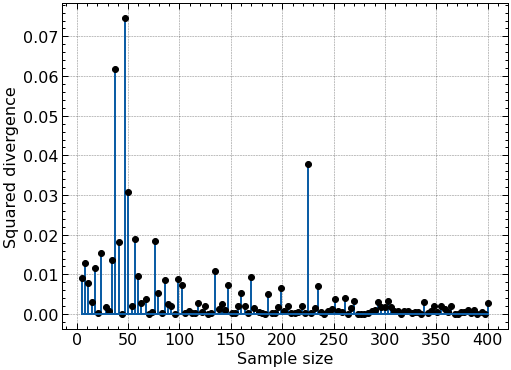

In [62]:
## Test the errors as a function of N

# range of sample sizes
Ns = np.round( np.linspace(5,400,123) ).astype(int)

# theoretical correlation coefficient (fixed)
r = .6

# initialize
corrs = np.zeros(len(Ns))

# run the experiment!
for ni in range(len(Ns)):
    x = np.random.randn(Ns[ni])
    y = x*r + np.random.randn(Ns[ni])*np.sqrt(1-r**2)
    corrs[ni] = (r-np.corrcoef(x,y)[0,1])**2
    

plt.stem(Ns,corrs,markerfmt='ko', basefmt='')
plt.xlabel('Sample size')
plt.ylabel('Squared divergence')
plt.show()

# 11. Correlation matrix

### Signal with noise

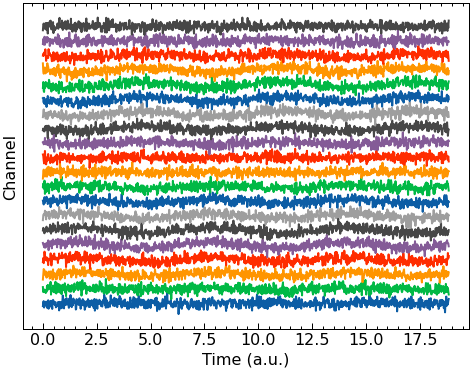

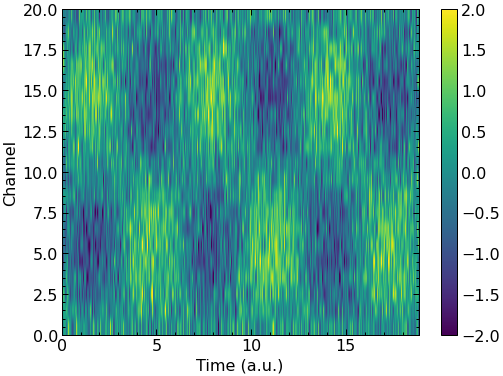

In [70]:
## simulate data

# simulation parameters
N = 1000  # time points
M =   20  # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# create the data
data = np.zeros((M,N))
for mi in range(M):
    data[mi,:] = np.sin(t) * chanrel[mi]

data = data + np.random.randn(M,N)
    

# two ways of visualizing the multichannel data
for i in range(M):
    plt.plot(t,data[i,:]+i*5) #plus i*5 so that the signals will not overlap
    
plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

plt.imshow(data,aspect='auto',vmin=-2,vmax=2,extent=[t[0],t[-1],0,M])
plt.grid(False)
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.show()

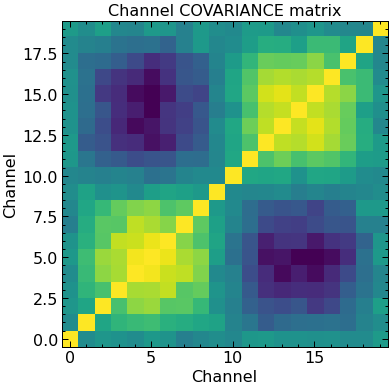

In [78]:
## now compute the covariance matrix

# note the size of the output!
dataCovMat = np.cov(data)

plt.imshow(dataCovMat,vmin=-.5,vmax=.5,origin='lower')
plt.title('Channel COVARIANCE matrix')
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.show()

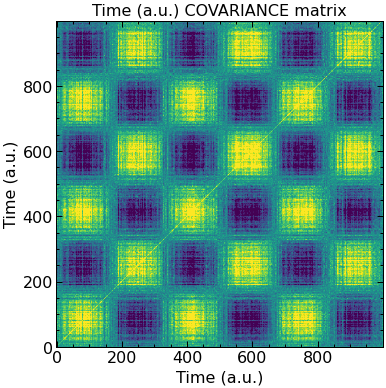

In [79]:
## now compute the covariance matrix

# note the size of the output!
dataCovMat = np.cov(data.T)

plt.imshow(dataCovMat,vmin=-.5,vmax=.5, origin='lower')
plt.title('Time (a.u.) COVARIANCE matrix')
plt.xlabel('Time (a.u.)')
plt.ylabel('Time (a.u.)')
plt.show()

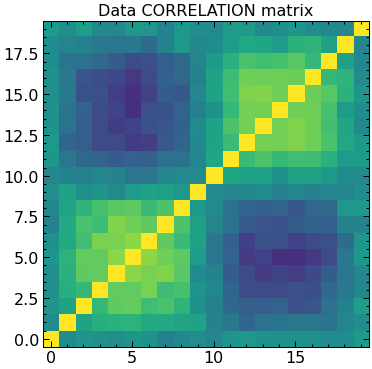

In [80]:
## and now the correlation matrix

# note the size of the output!
dataCorrMat = np.corrcoef(data)

plt.imshow(dataCorrMat,vmin=-.5,vmax=.5, origin='lower')
plt.title('Data CORRELATION matrix')
plt.grid(False)
plt.show()

### Signal without noise

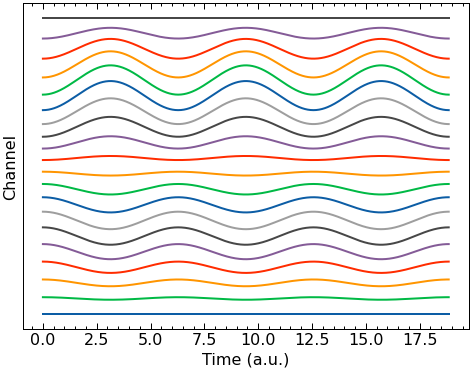

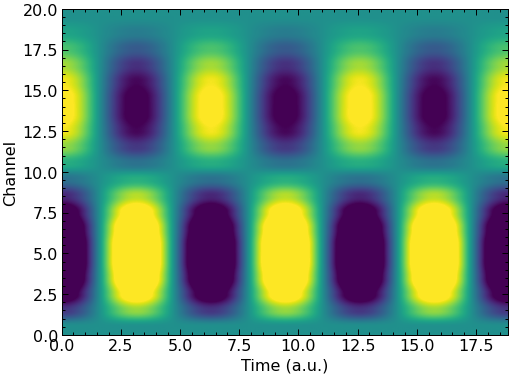

In [3]:
## simulate data

# simulation parameters
N = 1000  # time points
M =   20  # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# create the data
data = np.zeros((M,N))
for mi in range(M):
    data[mi,:] = np.cos(t) *np.sqrt(mi)* chanrel[mi]

data = data 
    

# two ways of visualizing the multichannel data
for i in range(M):
    plt.plot(t,data[i,:]+i*4)
    
plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.grid(False)
plt.show()

plt.imshow(data,aspect='auto',vmin=-2,vmax=2,extent=[t[0],t[-1],0,M])
plt.xlabel('Time (a.u.)')
plt.ylabel('Channel')
plt.grid(False)
plt.show()

In [11]:
pd.DataFrame(data, index=['signal_'+str(i+1) for i in range(len(data))])

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
signal_1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
signal_2,3.246995e-01,3.246417e-01,3.244683e-01,3.241794e-01,3.237751e-01,3.232556e-01,3.226209e-01,3.218714e-01,3.210073e-01,3.200290e-01,...,3.200290e-01,3.210073e-01,3.218714e-01,3.226209e-01,3.232556e-01,3.237751e-01,3.241794e-01,3.244683e-01,3.246417e-01,3.246995e-01
signal_3,8.686279e-01,8.684733e-01,8.680095e-01,8.672367e-01,8.661551e-01,8.647652e-01,8.630675e-01,8.610624e-01,8.587508e-01,8.561335e-01,...,8.561335e-01,8.587508e-01,8.610624e-01,8.630675e-01,8.647652e-01,8.661551e-01,8.672367e-01,8.680095e-01,8.684733e-01,8.686279e-01
signal_4,1.450015e+00,1.449757e+00,1.448983e+00,1.447692e+00,1.445887e+00,1.443567e+00,1.440733e+00,1.437386e+00,1.433527e+00,1.429158e+00,...,1.429158e+00,1.433527e+00,1.437386e+00,1.440733e+00,1.443567e+00,1.445887e+00,1.447692e+00,1.448983e+00,1.449757e+00,1.450015e+00
signal_5,1.938801e+00,1.938455e+00,1.937420e+00,1.935695e+00,1.933281e+00,1.930179e+00,1.926389e+00,1.921914e+00,1.916755e+00,1.910913e+00,...,1.910913e+00,1.916755e+00,1.921914e+00,1.926389e+00,1.930179e+00,1.933281e+00,1.935695e+00,1.937420e+00,1.938455e+00,1.938801e+00
signal_6,2.228431e+00,2.228034e+00,2.226844e+00,2.224862e+00,2.222087e+00,2.218521e+00,2.214165e+00,2.209022e+00,2.203091e+00,2.196377e+00,...,2.196377e+00,2.203091e+00,2.209022e+00,2.214165e+00,2.218521e+00,2.222087e+00,2.224862e+00,2.226844e+00,2.228034e+00,2.228431e+00
signal_7,2.243177e+00,2.242778e+00,2.241580e+00,2.239585e+00,2.236792e+00,2.233202e+00,2.228818e+00,2.223640e+00,2.217670e+00,2.210911e+00,...,2.210911e+00,2.217670e+00,2.223640e+00,2.228818e+00,2.233202e+00,2.236792e+00,2.239585e+00,2.241580e+00,2.242778e+00,2.243177e+00
signal_8,1.946543e+00,1.946196e+00,1.945157e+00,1.943425e+00,1.941001e+00,1.937886e+00,1.934082e+00,1.929589e+00,1.924408e+00,1.918543e+00,...,1.918543e+00,1.924408e+00,1.929589e+00,1.934082e+00,1.937886e+00,1.941001e+00,1.943425e+00,1.945157e+00,1.946196e+00,1.946543e+00
signal_9,1.346183e+00,1.345943e+00,1.345224e+00,1.344026e+00,1.342350e+00,1.340196e+00,1.337565e+00,1.334458e+00,1.330875e+00,1.326819e+00,...,1.326819e+00,1.330875e+00,1.334458e+00,1.337565e+00,1.340196e+00,1.342350e+00,1.344026e+00,1.345224e+00,1.345943e+00,1.346183e+00
signal_10,4.937838e-01,4.936959e-01,4.934322e-01,4.929929e-01,4.923781e-01,4.915880e-01,4.906228e-01,4.894830e-01,4.881690e-01,4.866811e-01,...,4.866811e-01,4.881690e-01,4.894830e-01,4.906228e-01,4.915880e-01,4.923781e-01,4.929929e-01,4.934322e-01,4.936959e-01,4.937838e-01


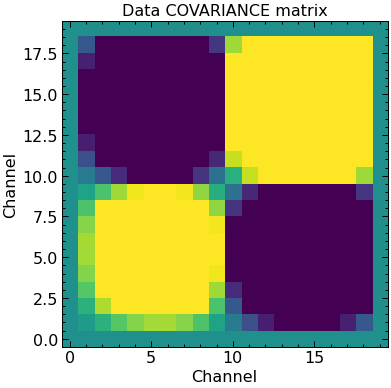

In [15]:
## now compute the covariance matrix

# note the size of the output!
dataCovMat = np.cov(data)

plt.imshow(dataCovMat,vmin=-.5,vmax=.5, origin='lower')
plt.title('Data COVARIANCE matrix')
plt.xlabel('Channel')
plt.ylabel('Channel')
plt.grid(False)
plt.show()

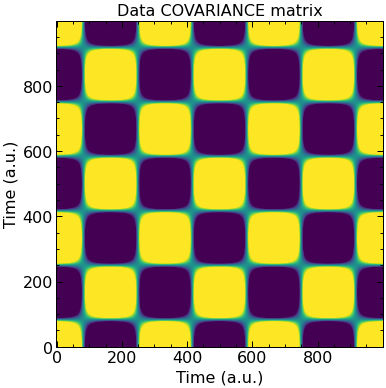

In [16]:
dataCovMat = np.cov(data.T)

plt.imshow(dataCovMat,vmin=-.5,vmax=.5, origin='lower')
plt.title('Data COVARIANCE matrix')
plt.xlabel('Time (a.u.)')
plt.ylabel('Time (a.u.)')
plt.grid(False)
plt.show()

Let's assume the noise is uncorrelated between x and y. Then the effect of adding noise will increase the variances of x and y, which makes the denominator term of the correlation coefficient larger, which makes the correlation itself smaller. Thus, averaging multiple correlation coefficients will make the average correlation small.

If the data are averaged first, then the noise cancels over the averaging process (assuming that the noise is distributed around 0), leading to cleaner data, which would produce a larger correlation coefficient.

This interpretation, however, can be complicated in certain datasets, in which the averaging removes the correlated patterns between the variables. This happens sometimes in time series data that have time-lags.

### correlation & average

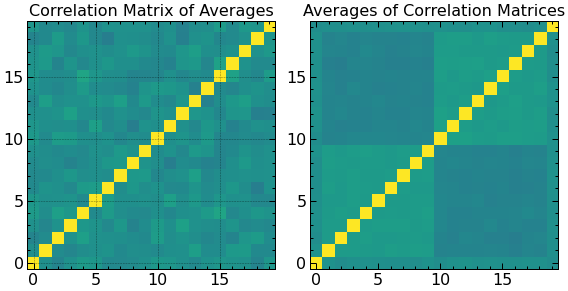

In [24]:
# simulation parameters
N = 1000  # time points
M =   20  # channels
 
# time vector (radian units)
t = np.linspace(0,6*np.pi,N)
 
# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))
 
#create noise
noise = np.linspace(0.00001, 3700, 20)
 
#initialize data lists
data_list = []
corr_matrices = []
 
#initialize data
data = np.zeros((M,N))
for mi in range(M):
    data[mi:] = np.sin(t) * chanrel[mi]
 
#create the matrices
for idx, n in enumerate(noise):
    data_list.append(data + np.random.randn(M,N)*n)
    data_mean = sum(data_list)/len(data_list)
    corr_mat = np.corrcoef(data_mean)
    corr_matrices.append(np.corrcoef(data_list[idx]))
    corr_mean = sum(corr_matrices)/len(corr_matrices)
 
 
fig, ax = plt.subplots(1,2)

ax[0].imshow(corr_mat,vmin=-.5,vmax=.5, origin='lower')
ax[0].set_title('Correlation Matrix of Averages')
plt.grid(False) 
ax[1].imshow(corr_mean,vmin=-.5,vmax=.5, origin='lower')
ax[1].set_title('Averages of Correlation Matrices')
plt.grid(False)
plt.tight_layout() 

### correlation to covariance: Linear Algebra

$$
C=∑R∑
$$

- $C$ Covariance matrix
- $∑$ Diagonal matrix of std.
- $R$ Correlation matrix


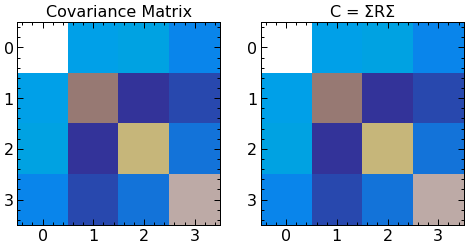

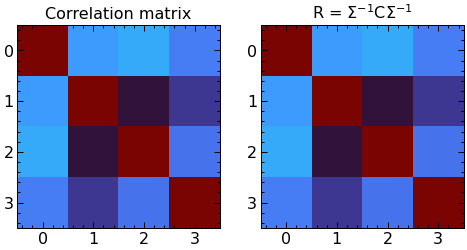

In [52]:
# create random data
M = 4
N = 50
A = np.random.randn(M,N)
 
# compute covariance and correlation directly
CorrA = np.corrcoef(A) #4x4
CovA = np.cov(A) #4X4
 
# compute stds diagonal matrix
std_matrix = np.zeros((M,M)) #4x4
 
for i in range(len(A)):
    std = np.std(A[i],ddof=1)
    std_matrix[i,i] = std
 
# compute covariance from correlation
CovA_rec = std_matrix@CorrA@std_matrix
 
# compute correlation from covariance
std_inv = np.linalg.inv(std_matrix)
CorrA_rec = std_inv@CovA@std_inv
 
# plot COVARIANCE matrices
plt.subplot(121)
plt.imshow(CovA,cmap='terrain')
plt.grid(False)
plt.title('Covariance Matrix')
 
plt.subplot(122)
plt.imshow(CovA_rec,cmap='terrain')
plt.grid(False)
plt.title('C = $\Sigma$R$\Sigma$')
plt.show()
 
# plot CORRELATION matrices
plt.subplot(121)
plt.imshow(CorrA,cmap='turbo')
plt.grid(False)
plt.title('Correlation matrix')
 
plt.subplot(122)
plt.imshow(CorrA_rec,cmap='turbo')
plt.title('R = $\Sigma^{-1}$C$\Sigma^{-1}$')
plt.grid(False)
plt.show()

#### Simple Notes: Pandas filtering vs Numpy filtering

In [48]:
M = 3
N = 5
A = np.random.randn(M,N) #M rows, N Columns
A

array([[ 0.61290779,  0.93120784, -0.2035244 , -0.09469844,  0.02163349],
       [-0.10229882,  0.50653966,  0.09346181, -0.18905773, -0.8930301 ],
       [ 1.18766003,  1.5092945 , -1.48042343, -0.26042033, -2.0613948 ]])

In [49]:
A[1]# Numpy

array([-0.10229882,  0.50653966,  0.09346181, -0.18905773, -0.8930301 ])

In [50]:
pd.DataFrame(A)

,0,1,2,3,4
0,0.612908,0.931208,-0.203524,-0.094698,0.021633
1,-0.102299,0.506540,0.093462,-0.189058,-0.893030
2,1.187660,1.509294,-1.480423,-0.260420,-2.061395


In [51]:
pd.DataFrame(A)[1] #Pandas

0    0.931208
1    0.506540
2    1.509294
Name: 1, dtype: float64

# 12. Partial correlations

- Partial correlation formula
$$
\rho_{xy|z}=\frac{r_{xy}-r_{xz}r_{yz}}{\sqrt{1-r_{xz}^2}\sqrt{1-r_{yz}^2}}
$$

### Manual method: GMAT, sosio economic, hours spent studying

In [60]:
## the example from the video

# raw correlations
#g=business school exam (GMAT)|m=sosio economic status|s=hours spent studying

rmg = .7 
rsg = .8 
rms = .9 

# partial correlations
rho_mg_s = (rmg - rsg*rms) / ( np.sqrt(1-rsg**2)*np.sqrt(1-rms**2) )
rho_sg_m = (rsg - rmg*rms) / ( np.sqrt(1-rmg**2)*np.sqrt(1-rms**2) )

print(rho_mg_s)
print(rho_sg_m)


-0.07647191129018778
0.5461186812727504


### Pingouin Library: Weather, Ice Cream, Shark attacks

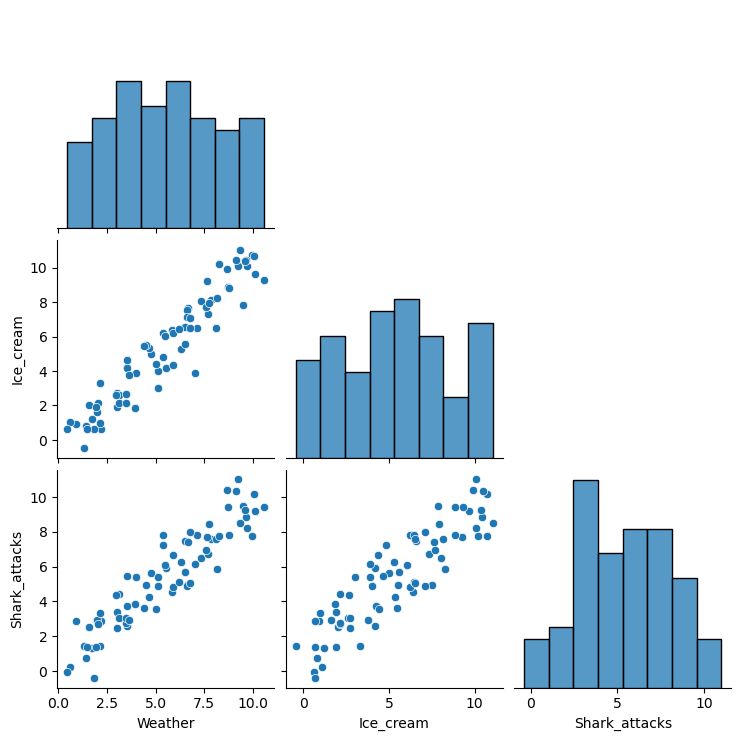

In [84]:
## now for datasets
N = 76

# correlated datasets
x1 = np.linspace(1,10,N) + np.random.randn(N) #Weather
x2 = x1 + np.random.randn(N) #Ice Cream
x3 = x1 + np.random.randn(N) # Shark Attacks

# let's convert these data to a pandas frame
df = pd.DataFrame()
df['Weather'] = x1
df['Ice_cream'] = x2
df['Shark_attacks'] = x3
sns.pairplot(df, corner=True);

In [85]:
# compute the "raw" correlation matrix
cormatR = df.corr()
print(cormatR)

# print out one value
print(' ')
print(cormatR.values[1,0])

# partial correlation
pc = pg.partial_corr(df,x='Shark_attacks',y='Ice_cream',covar='Weather') #Partialling out WEATHER
print(' ')
print(pc)

                Weather  Ice_cream  Shark_attacks
Weather        1.000000   0.952434       0.926903
Ice_cream      0.952434   1.000000       0.892672
Shark_attacks  0.926903   0.892672       1.000000
 
0.9524342026088449
 
          n      r          CI95%     r2  adj_r2     p-val   BF10  power
pearson  76  0.086  [-0.14, 0.31]  0.007   -0.02  0.459076  0.188  0.115


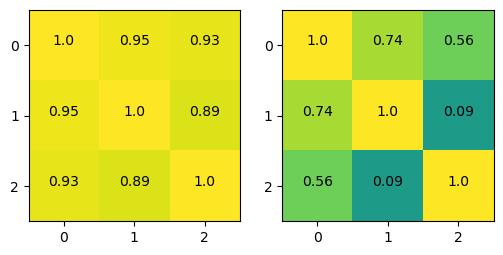

In [86]:
## visualize the matrices

fig,ax = plt.subplots(1,2,figsize=(6,3))

# raw correlations
ax[0].imshow(cormatR.values,vmin=-1,vmax=1)
ax[0].set_xticks(range(3))
ax[0].set_yticks(range(3))

# add text 
for i in range(3):
    for j in range(3):
        ax[0].text(i,j,np.round(cormatR.values[i,j],2), horizontalalignment='center')

        
        
# partial correlations
partialCorMat = df.pcorr()
ax[1].imshow(partialCorMat.values,vmin=-1,vmax=1)
ax[1].set_xticks(range(3))
ax[1].set_yticks(range(3))

for i in range(3):
    for j in range(3):
        ax[1].text(i,j,np.round(partialCorMat.values[i,j],2), horizontalalignment='center')

plt.show()

# 13. Spearman correlation, Fisher-Z, & C.I. for correlation

### Anscobe's quartet

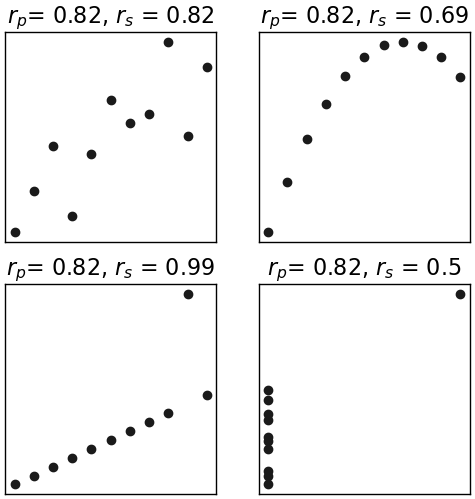

In [93]:
anscombe = np.array([
     # series 1     series 2      series 3       series 4
    [10,  8.04,    10,  9.14,    10,  7.46,      8,  6.58, ],
    [ 8,  6.95,     8,  8.14,     8,  6.77,      8,  5.76, ],
    [13,  7.58,    13,  8.76,    13, 12.74,      8,  7.71, ],
    [ 9,  8.81,     9,  8.77,     9,  7.11,      8,  8.84, ],
    [11,  8.33,    11,  9.26,    11,  7.81,      8,  8.47, ],
    [14,  9.96,    14,  8.10,    14,  8.84,      8,  7.04, ],
    [ 6,  7.24,     6,  6.13,     6,  6.08,      8,  5.25, ],
    [ 4,  4.26,     4,  3.10,     4,  5.39,      8,  5.56, ],
    [12, 10.84,    12,  9.13,    12,  8.15,      8,  7.91, ],
    [ 7,  4.82,     7,  7.26,     7,  6.42,      8,  6.89, ],
    [ 5,  5.68,     5,  4.74,     5,  5.73,     19, 12.50, ]
    ])


# plot and compute correlations
fig,ax = plt.subplots(2,2,figsize=(6,6))
ax = ax.ravel()

for i in range(4):
    ax[i].plot(anscombe[:,i*2],anscombe[:,i*2+1],'ko')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    corr_p = stats.pearsonr(anscombe[:,i*2],anscombe[:,i*2+1])[0]
    corr_s = stats.spearmanr(anscombe[:,i*2],anscombe[:,i*2+1])[0]
    ax[i].set_title('$r_p$= %g, $r_s$ = %g'%(np.round(corr_p*100)/100,np.round(corr_s*100)/100))
plt.grid(True)
plt.show()

### Spearman Corr

- Pearson correlation can over- or under-present relationships if they contain nonlinearities or outliers
- Pearson is appropriate for normally distributed data
- Spearman's rho test (rank correlation) is for monotonic relationship, regardless of whether the data relationship is linear or nonlinear
- Algortihm: Transform boith variables to rank, compute Pearson corr on ranks, p-value is the same as for 'regular' Pearson corr.

Pearson's correlation on rank-transformed data: 0.8656422569027614
Spearman rank correlation: 0.865642256902761


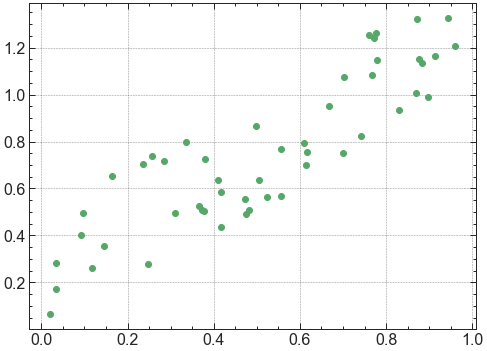

In [22]:
N = 50
x = np.random.rand(N)
y = x + np.random.rand(N) * 0.5
plt.plot(x, y,'go')
 
from scipy.stats import rankdata
x_rank = rankdata(x, method='ordinal')
y_rank = rankdata(y, method='ordinal')
 
corr_p = stats.pearsonr(x_rank, y_rank)[0]
corr_s = stats.spearmanr(x, y)[0]
 
print("Pearson's correlation on rank-transformed data:", corr_p)
print("Spearman rank correlation:", corr_s)

### Fisher-Z transform

- Correlation coefficients are uniformly normally distributed -1 to 1. Many analysis methods asusme normal distributions.
- Fisher-Z transform formula
$$ Z_r=\frac{1}{2}ln\ \left(\frac{1+r}{1-r}\right)=archtanh(r)$$

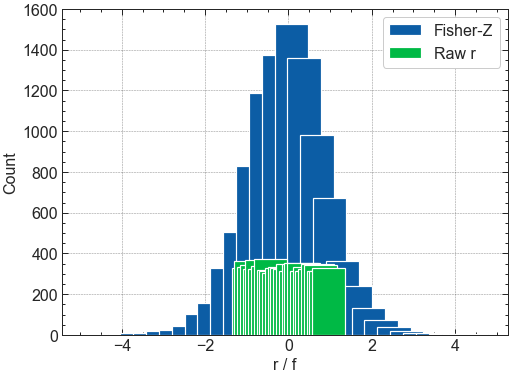

In [3]:
# simulate correlation coefficients
N = 10000
r = 2*np.random.rand(N) - 1

# Fisher-Z
fz = np.arctanh(r)

# overlay the Fisher-Z
y,x = np.histogram(fz,30)
x = (x[1:]+x[0:-1])/2
plt.bar(x,y, edgecolor='white', linewidth=1.2)

# raw correlations
y,x = np.histogram(r,30)
x = (x[1:]+x[0:-1])/2
plt.bar(x,y, edgecolor='white', linewidth=1.2)


plt.xlabel('r / f')
plt.ylabel('Count')
plt.legend(('Fisher-Z','Raw r'))

plt.show()

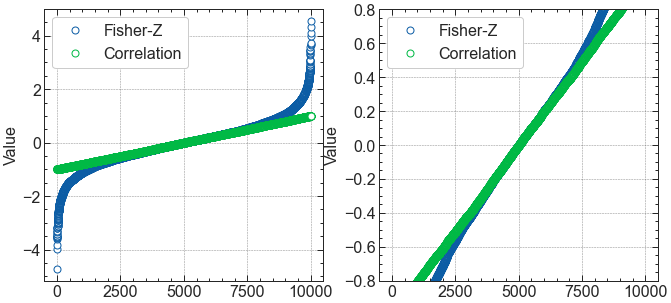

In [20]:
fig, ax= plt.subplots(1, 2, figsize=(11,5))
ax[0].plot(range(N),np.sort(fz),'o',markerfacecolor='w',markersize=7)
ax[0].plot(range(N),np.sort(r), 'o',markerfacecolor='w',markersize=7)
ax[0].legend(('Fisher-Z','Correlation'))
ax[0].set_ylabel('Value')


ax[1].plot(range(N),np.sort(fz),'o',markerfacecolor='w',markersize=7)
ax[1].plot(range(N),np.sort(r), 'o',markerfacecolor='w',markersize=7)
ax[1].set_ylabel('Value')
ax[1].legend(('Fisher-Z','Correlation'))
ax[1].set_ylim([-.8,.8])
plt.show()

### Bootstrapping/ Resampling

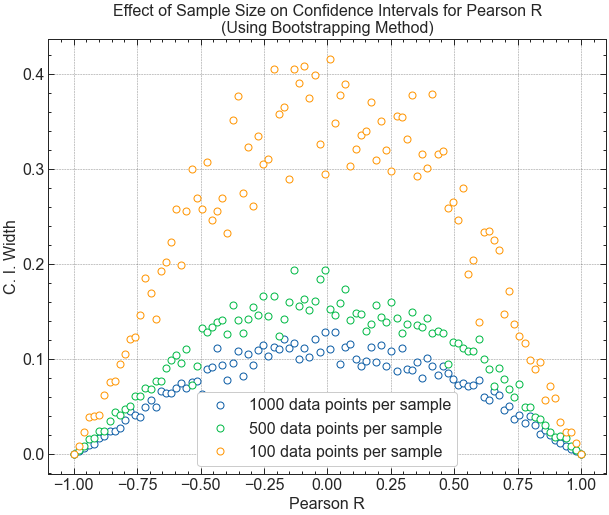

In [23]:
def get_ci_by_r_dist(num_data_pts=1000, num_rs=100):
    r_values = np.linspace(-1, 1, num_rs)
    ci_widths = []
    N = num_data_pts # number of data points in each distribution
    num_boots = 80 # number of resamples
 
    for r in r_values:
        # create a distribution with the correlation coef = r
        x = np.random.rand(N)
        y = np.random.rand(N)
        y = x*r + y*np.sqrt(1-r**2)
 
        # now that you have the x and y get the CI using resamples
        bootrs = np.zeros(num_boots) # will store the r for each resample
 
        for i in range(num_boots):
            shuffled_indexes = np.random.choice(range(N), N)
            bootx = x[shuffled_indexes]
            booty = y[shuffled_indexes]
            bootr = stats.pearsonr(bootx, booty)[0]
            bootrs[i] = bootr
 
        # now that you have dist of r values for the resample generate C.I.
        ci_lower = np.percentile(bootrs, 2.5)
        ci_upper = np.percentile(bootrs, 97.5)
        ci_width = ci_upper - ci_lower
        ci_widths.append(ci_width)
        
    return r_values, ci_widths # x,y points for graph
 
plt.figure(figsize=(10,8))
 
x,y = get_ci_by_r_dist(num_data_pts=1000)
plt.plot(x, y, 'o',markerfacecolor='w',markersize=7)
 
x,y = get_ci_by_r_dist(num_data_pts=500)
plt.plot(x, y, 'o',markerfacecolor='w',markersize=7)
 
x,y = get_ci_by_r_dist(num_data_pts=100)
plt.plot(x, y, 'o',markerfacecolor='w',markersize=7)
 
plt.title("Effect of Sample Size on Confidence Intervals for Pearson R\n(Using Bootstrapping Method)")
plt.legend(["1000 data points per sample", "500 data points per sample", "100 data points per sample"])
plt.xlabel("Pearson R")
plt.ylabel("C. I. Width")
plt.show()

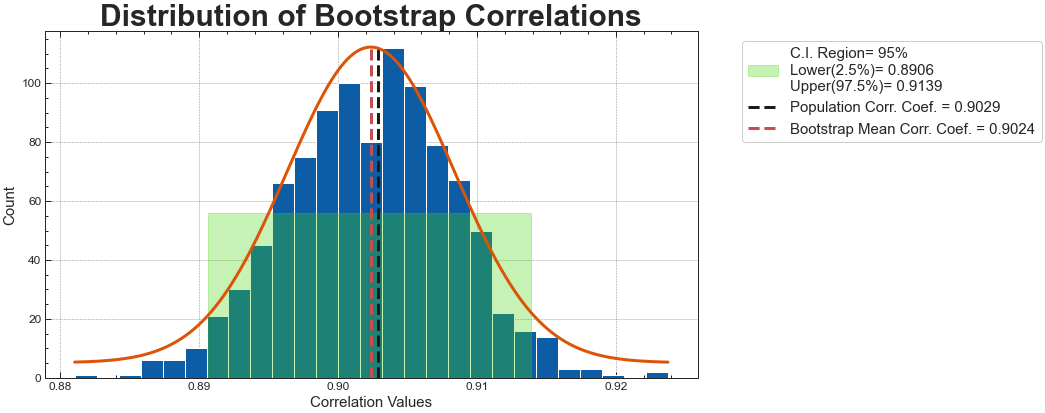

In [24]:
def corr_bootstrap(data_means, corr_coef, size, confidence=95, bootstrap_size=None, num_bootstraps=1000, random_state=None, tol=1e-8):
    if bootstrap_size == None:
        bootstrap_size = size
        
    cov = np.array([[1,corr_coef],[corr_coef,1]])
    if random_state != None:
        np.random.seed(random_state)
    data = np.random.multivariate_normal(mean=data_means, cov=cov, size=size, tol=tol)
    data_corr, data_pval = stats.pearsonr(data[:,0],data[:,1])
    upper_bound = 100 - (100 - confidence) / 2
    lower_bound = (100 - confidence) / 2
    
    bootstrap_correlations = np.zeros(num_bootstraps)
 
    for bi in range(num_bootstraps):
        bootstrap_indices = np.random.choice(range(len(data)), size=bootstrap_size, replace=True)
        bootstrap_correlations[bi] = stats.pearsonr(data[bootstrap_indices,0],data[bootstrap_indices,1])[0]
    
    avg_bootstrap_corr = np.mean(bootstrap_correlations)
    conf_int = np.zeros(2)
    conf_int[0] = np.percentile(bootstrap_correlations, lower_bound)
    conf_int[1] = np.percentile(bootstrap_correlations, upper_bound)
    
 
    fig, ax = plt.subplots(figsize=(10,6))  
    n, bins, patches = ax.hist(bootstrap_correlations, 'fd')
    ax.fill_between(conf_int,0,n.max()/2, color='#45D60B', alpha=0.3, zorder=2,
                    label=f'C.I. Region= {confidence}%\nLower({lower_bound}%)= {np.round(conf_int[0],4)}\nUpper({upper_bound}%)= {np.round(conf_int[1],4)}')
    ax.plot([data_corr,data_corr], [0,n.max()], 'k--', linewidth=3, label=f'Population Corr. Coef. = {np.round(data_corr,4)}')
    ax.plot([avg_bootstrap_corr,avg_bootstrap_corr],[0,n.max()], 'r--', linewidth=3, label=f'Bootstrap Mean Corr. Coef. = {np.round(avg_bootstrap_corr, 4)}')
    
    ax.tick_params(labelsize=12)
    ax.set_xlabel('Correlation Values', fontsize=15)
    ax.set_ylabel('Count', fontsize=15)
    ax.set_title('Distribution of Bootstrap Correlations', fontsize=30, fontweight='semibold')
    
    ax2 = ax.twinx()
    x = np.linspace(bootstrap_correlations.min(), bootstrap_correlations.max(), 1001)
    y = stats.norm.pdf(x, loc=np.mean(bootstrap_correlations), scale=np.std(bootstrap_correlations))
    ax2.plot(x,y, color='#DC5407', linewidth=3)
    ax2.set_yticks([])
    
    fig.legend(loc='upper right',bbox_to_anchor=(1,0.9,0.47,0),fontsize=15)
    fig.tight_layout()
    plt.show()
    
corr_bootstrap(data_means=[1.2,2.3], corr_coef=0.9, size=10000, bootstrap_size=1000,num_bootstraps=1000)

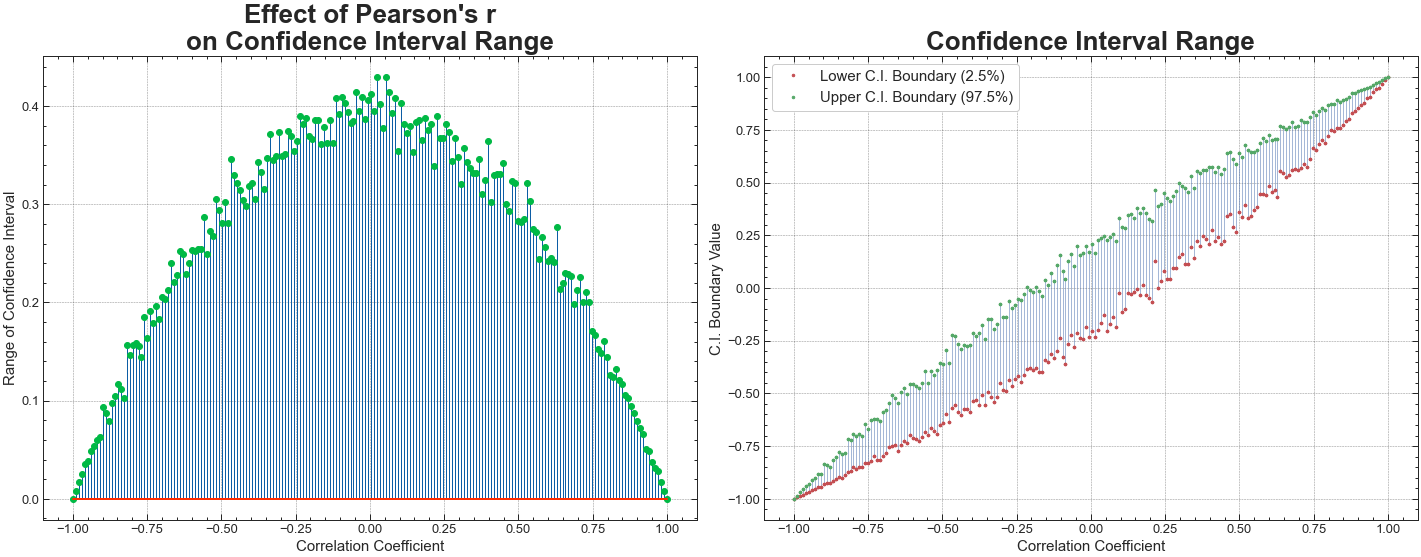

In [25]:
def ci_effects(data_means, corr_coefficients, size, confidence=95, bootstrap_size=None, num_bootstraps=1000):
    if bootstrap_size == None:
        bootstrap_size = size
        
    upper_bound = 100 - (100 - confidence) / 2
    lower_bound = (100 - confidence) / 2
    
    conf_int_ranges = np.zeros(len(corr_coefficients))
    conf_int_lower_bounds = np.zeros(len(corr_coefficients))
    conf_int_upper_bounds = np.zeros(len(corr_coefficients))
    for coefi in range(len(corr_coefficients)):
        cov = np.array([[1,corr_coefficients[coefi]],[corr_coefficients[coefi],1]])
        data = np.random.multivariate_normal(mean=data_means, cov=cov, size=size)
    
        bootstrap_correlations = np.zeros(num_bootstraps)
 
        for bi in range(num_bootstraps):
            bootstrap_indices = np.random.choice(range(len(data)), size=bootstrap_size, replace=True)
            bootstrap_correlations[bi] = stats.pearsonr(data[bootstrap_indices,0],data[bootstrap_indices,1])[0]
            
        conf_int = np.zeros(2)
        conf_int[0] = np.percentile(bootstrap_correlations, lower_bound)
        conf_int[1] = np.percentile(bootstrap_correlations, upper_bound)
        conf_int_range = conf_int[1] - conf_int[0]
        conf_int_ranges[coefi] = conf_int_range
        conf_int_lower_bounds[coefi] = conf_int[0]
        conf_int_upper_bounds[coefi] = conf_int[1]
        
    
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
    #ax1.plot(corr_coefficients, conf_int_ranges, 'b.')
    markerline, stemlines, baseline = ax1.stem(corr_coefficients, conf_int_ranges, markerfmt='C1o')
    plt.setp(stemlines, 'linewidth', 1)
    ax1.set_title('Effect of Pearson\'s r\non Confidence Interval Range', fontsize=26, fontweight='semibold')
    ax1.set_xlabel('Correlation Coefficient', fontsize=15)
    ax1.set_ylabel('Range of Confidence Interval', fontsize=15)
    ax1.tick_params(labelsize=13)
    
 
    ax2.plot([corr_coefficients,corr_coefficients],[conf_int_lower_bounds,conf_int_upper_bounds], 'b-', linewidth=0.5)
    ax2.plot([corr_coefficients,corr_coefficients],[conf_int_lower_bounds,conf_int_lower_bounds], 'r.', ms=5, label=f'Lower C.I. Boundary ({lower_bound}%)')
    ax2.plot([corr_coefficients,corr_coefficients],[conf_int_upper_bounds,conf_int_upper_bounds], 'g.', ms=5, label=f'Upper C.I. Boundary ({upper_bound}%)')
    ax2.set_title('Confidence Interval Range', fontsize=26, fontweight='semibold')
    ax2.set_xlabel('Correlation Coefficient', fontsize=15)
    ax2.set_ylabel('C.I. Boundary Value', fontsize=15)
    ax2.tick_params(labelsize=13)
    handles, labels = ax2.get_legend_handles_labels()
    newLabels, newHandles = [], []
    for handle, label in zip(handles, labels):
        if label not in newLabels:
            newLabels.append(label)
            newHandles.append(handle)
    ax2.legend(newHandles,newLabels, fontsize=15)
    
    fig.tight_layout()
    plt.show()
        
ci_effects(data_means=[1.2,2.3], corr_coefficients=np.linspace(-1,1,200), size=1000, bootstrap_size=100,num_bootstraps=1000)

# 14. Kendall 

- Used for ordinal data: numerical meaningful order, but no fixed relationship across the levels
- Examples: education (bachelor, master, phd), movie ratings (1, 2, 3, 4, 5)
- Transform the data to rank 
- Kendall tau-b has an adjustment for ties, and is most often used
- Interpretation is identical to Pearson

### Documentary rating 

In [62]:
## generate some data!

N = 100

# movie ratings
docuRatings = np.random.randint(low=1,high=6,size=N)

# education level (1-4, correlated with docuRatings)
eduLevel = np.ceil( (docuRatings + np.random.randint(low=1,high=5,size=N) )/9 * 4 )

df=pd.DataFrame({'Education':eduLevel, 'Rates': docuRatings, 'Counts': np.ones(N)} )
df.groupby(['Education', 'Rates']).count()

Counts
Education Rates        
1.0       1           3
2.0       1          16
          2          12
          3           6
3.0       1           8
          2          10
          3           6
          4           5
          5           4
4.0       3           7
          4          11
          5          12

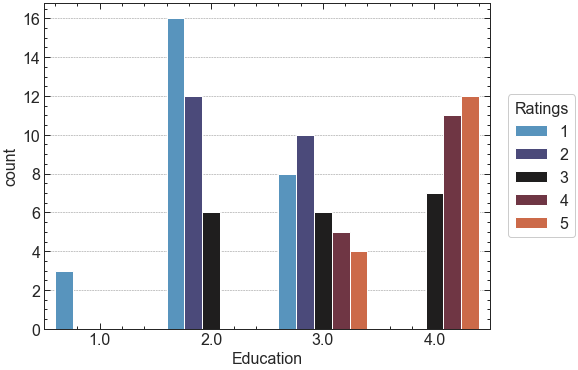

In [76]:
sns.countplot(data=df, x='Education', hue='Rates', palette='icefire')
plt.legend(title='Ratings', bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0);

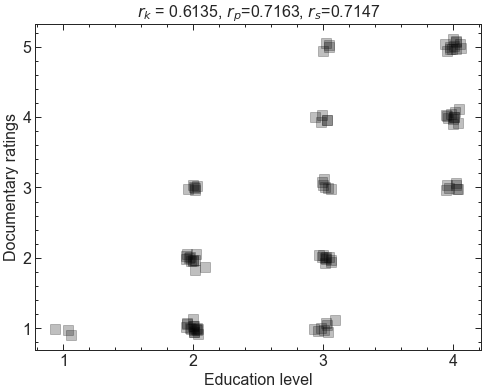

In [80]:
# compute the correlations
cr = [0,0,0]
cr[0] = stats.kendalltau(eduLevel,docuRatings)[0]
cr[1] = stats.pearsonr(eduLevel,docuRatings)[0]
cr[2] = stats.spearmanr(eduLevel,docuRatings)[0]

# round for convenience
cr = np.round(cr,4)


# plot the data
plt.plot(eduLevel+np.random.randn(N)/30,docuRatings+np.random.randn(N)/20,'ks',markersize=10,markerfacecolor=[0,0,0,.25])
plt.xticks(np.arange(4)+1)
plt.yticks(np.arange(5)+1)
plt.xlabel('Education level')
plt.ylabel('Documentary ratings')
plt.grid()
plt.title('$r_k$ = %g, $r_p$=%g, $r_s$=%g'%(cr[0],cr[1],cr[2]))

plt.show()

### Kendall vs Pearson vs Spearman

In [82]:
numExprs = 1000
nValues = 50
nCategories = 6

c = np.zeros((numExprs,3))

for i in range(numExprs):
    
    # create data
    x = np.random.randint(low=0,high=nCategories,size=nValues)
    y = np.random.randint(low=0,high=nCategories,size=nValues)
    
    # store correlations
    c[i,:] = [ stats.kendalltau(x,y)[0], stats.pearsonr(x,y)[0], stats.spearmanr(x,y)[0] ]
    
pd.DataFrame(c, columns=['Kendall', 'Pearson', 'Spearman'])

,Kendall,Pearson,Spearman
0,0.031008,0.037081,0.037699
1,0.021359,0.027595,0.033183
2,-0.121718,-0.157962,-0.147451
3,0.058224,0.077924,0.074344
4,-0.078165,-0.138381,-0.137787
...,...,...,...
995,-0.004973,0.023444,0.000904
996,-0.097976,-0.110458,-0.123851
997,0.030186,0.029283,0.032405
998,0.126233,0.100388,0.137870


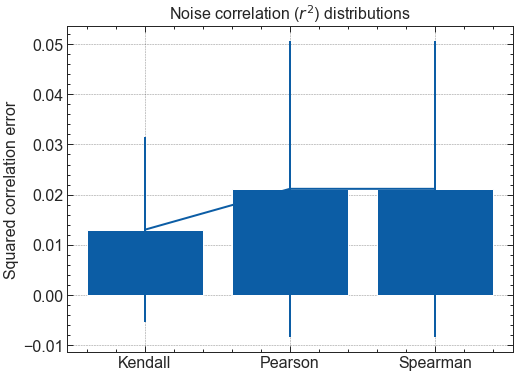

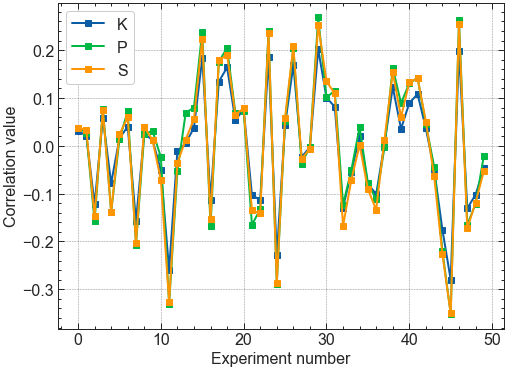

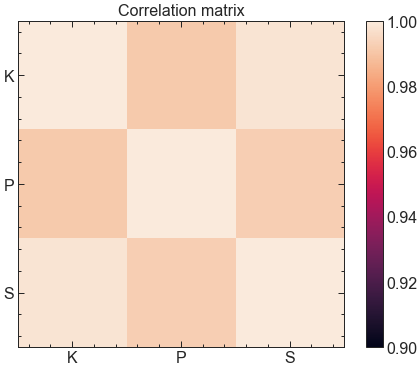

In [86]:
## show the graphs
plt.bar(range(3),np.mean(c**2,axis=0))
plt.errorbar(range(3),np.mean(c**2,axis=0),yerr=np.std(c**2,ddof=1,axis=0))
plt.xticks(range(3),('Kendall','Pearson','Spearman'))
plt.ylabel('Squared correlation error')
plt.title('Noise correlation ($r^2$) distributions')
plt.show()


plt.plot(c[:50,:] ,'s-')
plt.xlabel('Experiment number')
plt.ylabel('Correlation value')
plt.legend(('K','P','S'))
plt.show()


plt.imshow(np.corrcoef(c.T),vmin=.9,vmax=1)
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.xticks(range(3),['K','P','S'])
plt.yticks(range(3),('K','P','S'))
plt.grid()
plt.title('Correlation matrix')
plt.show()


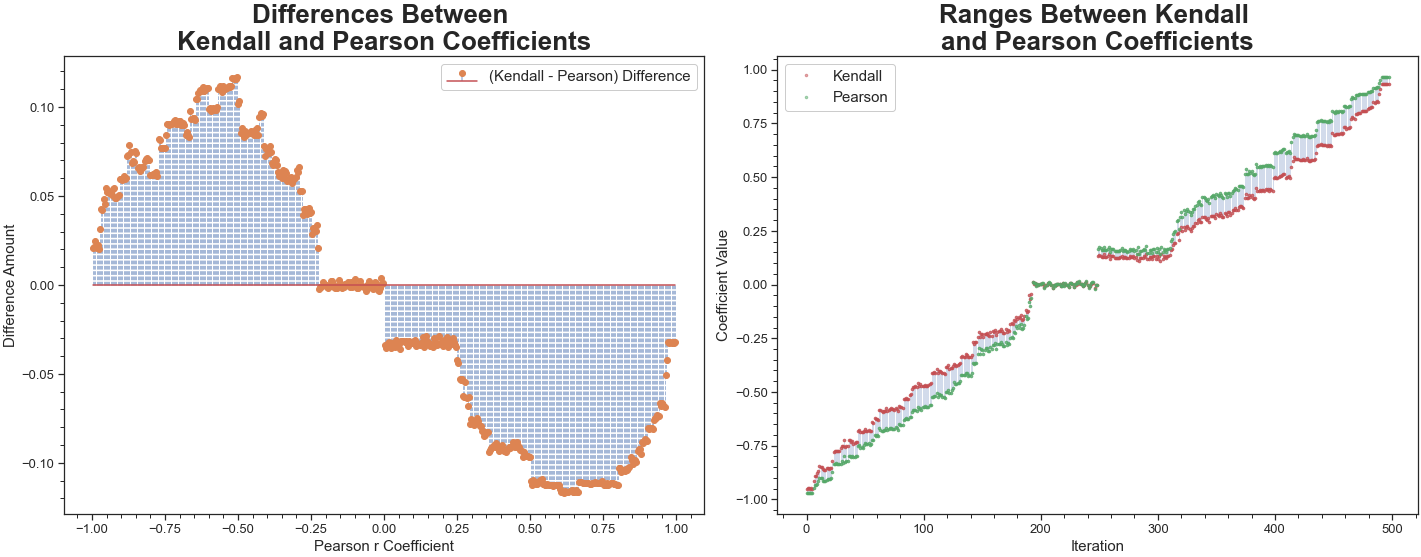

In [75]:
def pearson_kendall_comparison(corr_coefficients, size, n_categories):
    corr_coefficients = corr_coefficients[(corr_coefficients > -1) & (corr_coefficients < 1)]
 
    pearson_correlations = np.zeros(len(corr_coefficients))
    kendall_correlations = np.zeros(len(corr_coefficients))
    correlation_ranges = np.zeros(len(corr_coefficients))
    
    for cori in range(len(corr_coefficients)):
        
        cov = np.array([[1,corr_coefficients[cori]],[corr_coefficients[cori],1]])
        L = np.linalg.cholesky(cov)
        uncorrelated = np.random.randint(low=0, high=n_categories, size=(2,size))
        correlated = np.dot(L, uncorrelated).astype(int)
        pearson = stats.pearsonr(correlated[0], correlated[1])[0]
        kendall = stats.kendalltau(correlated[0], correlated[1])[0]
        pearson_correlations[cori] = pearson
        kendall_correlations[cori] = kendall
        correlation_ranges[cori] = kendall - pearson
        
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,8))
    #ax1.plot(corr_coefficients, conf_int_ranges, 'b.')
    markerline, stemlines, baseline = ax1.stem(corr_coefficients, correlation_ranges, markerfmt='C1o', label='(Kendall - Pearson) Difference')
    plt.setp(stemlines, 'linewidth', 1, 'linestyle','--', 'alpha', 0.5)
    ax1.set_title('Differences Between \nKendall and Pearson Coefficients', fontsize=26, fontweight='semibold')
    ax1.set_xlabel('Pearson r Coefficient', fontsize=15)
    ax1.set_ylabel('Difference Amount', fontsize=15)
    ax1.tick_params(labelsize=13)
    ax1.legend(fontsize=15)
    
    x_values = np.arange(len(corr_coefficients))
    ax2.plot([x_values,x_values],[kendall_correlations,pearson_correlations], 'b-', linewidth=0.5, alpha=0.5) # corr_coefficients,corr_coefficients
    ax2.plot([x_values,x_values],[kendall_correlations,kendall_correlations], 'r.', ms=5, label='Kendall', alpha=0.5) # corr_coefficients,corr_coefficients
    ax2.plot([x_values,x_values],[pearson_correlations,pearson_correlations], 'g.', ms=5, label='Pearson', alpha=0.5) # corr_coefficients,corr_coefficients
    ax2.set_title('Ranges Between Kendall \nand Pearson Coefficients', fontsize=26, fontweight='semibold')
    ax2.set_xlabel('Iteration', fontsize=15)
    ax2.set_ylabel('Coefficient Value', fontsize=15)
    ax2.tick_params(labelsize=13)
    handles, labels = ax2.get_legend_handles_labels()
    newLabels, newHandles = [], []
    for handle, label in zip(handles, labels):
        if label not in newLabels:
            newLabels.append(label)
            newHandles.append(handle)
    ax2.legend(newHandles,newLabels, fontsize=15)
    
    fig.tight_layout()
    plt.show()
 
 
        
pearson_kendall_comparison(corr_coefficients=np.linspace(-1,1,500), size=10000, n_categories=5)

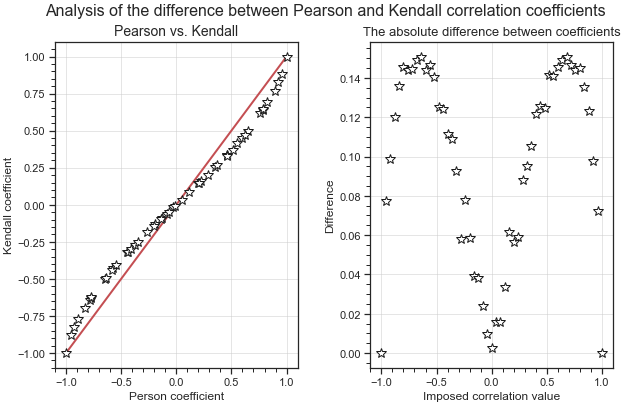

In [76]:
def scale_to_interval(data, interval):
    '''
    Changes the data range to that specified in the parameter interval
    '''
    new_data = (interval[0] + (data - np.min(data))*(interval[1] - interval[0])
                / (np.max(data) - np.min(data)))
    return np.round(new_data, 0)
 
 
n_cat = 10  # number of categories
n_values = 1000  # number of values in each sample
r_d_array = np.linspace(-1, 1, 51)  # desired correlation values
corr_array = np.zeros((len(r_d_array), 2))  # Pearson and Kendall corr coeffs
corr_diff = np.zeros((len(r_d_array), 1))  # difference between P and K
 
# Calculations
for i in range(len(r_d_array)):
    # Generate data
    x = np.random.default_rng().integers(low=1, high=n_cat+1, size=n_values)
    y = (x*r_d_array[i] + np.random.default_rng().integers(1, n_cat+1, n_values)
         * np.sqrt(1 - r_d_array[i]**2))
    # Let's shift the values along y so that they lie in the interval [1, 10]
    y = scale_to_interval(y, [1, n_cat])
    # Calculate and store Pearson and Kendall correlation coefficients
    corr_array[i, 0] = stats.pearsonr(x, y)[0]
    corr_array[i, 1] = stats.kendalltau(x, y)[0]
    corr_diff[i] = np.abs(corr_array[i, 0] - corr_array[i, 1])
 
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle(
    'Analysis of the difference between Pearson and Kendall '
    + 'correlation coefficients',
    fontsize=16, y=0.97
    )
fig.subplots_adjust(wspace=0.3)
 
ax1.plot([-1, 1], [-1, 1], 'r', linewidth=2)
ax1.plot(corr_array[:, 0], corr_array[:, 1], '*k', markerfacecolor='white',
         markersize=10)
ax1.set_title('Pearson vs. Kendall', fontsize=14)
ax1.set_xlabel('Person coefficient', fontsize=12)
ax1.set_ylabel('Kendall coefficient', fontsize=12)
ax1.grid()
 
ax2.plot(r_d_array, corr_diff, '*k', markerfacecolor='white',
         markersize=10)
ax2.set_title('The absolute difference between coefficients',
              fontsize=13)
ax2.set_xlabel('Imposed correlation value', fontsize=12)
ax2.set_ylabel('Difference', fontsize=12)
ax2.grid()

### Simpson's paradox: subgroups correlation paradox

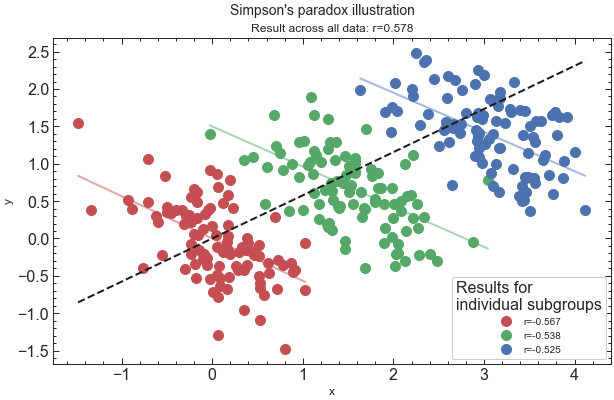

In [87]:
from scipy.stats import pearsonr

n_sg = 3  # number of subgroups in the data
n_sg_values = 100   # number of data points in each subgroup
r_sg = [-0.5, -0.6, -0.5]  # correlation coefficients imposed on the subgroups
c = 'rgb'  # subgroup's colors
offsets = [0, 1.5, 3]  # mean offsets
# Arrays for storing the complete set of x and y values.
all_x = np.array([])
all_y = np.array([])
 
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle("Simpson's paradox illustration", fontsize=14, y=0.96)
 
# Dealing with the subgroups
for i in range(n_sg):
    # Creation of data for the current subgroup,
    # taking into account the desired correlation coefficient and offset value
    x = np.random.default_rng().standard_normal(n_sg_values)/2 + offsets[i]
    y = (np.sqrt(1-r_sg[i]**2)
         * np.random.default_rng().standard_normal(n_sg_values)/2
         + x*r_sg[i] + offsets[i])
    # Calculation of the corr coeff directly from the current subgroup data
    r_p, p_value = pearsonr(x, y)
    # Append the current subgroup data to arrays
    all_x = np.append(all_x, x)
    all_y = np.append(all_y, y)
    # Plot the subgroup and its linear correlation.
    ax.plot(x[::1], y[::1], 'o', color=c[i], markersize=10,
            label=f"r={r_p:.3f}")
    x_corr = np.array([np.min(x), np.max(x)])
    y_corr = x_corr*r_p + offsets[i]
    ax.plot(x_corr, y_corr, color=c[i], alpha=0.5, linewidth=2)
 
# Corr coeff of the whole dataset
r_p, p_value = pearsonr(all_x, all_y)
# Add this linear correlation to the plot
x_corr = np.array([np.min(all_x), np.max(all_x)])
y_corr = x_corr*r_p + offsets[0]
ax.plot(x_corr, y_corr, 'k--', linewidth=2)
# Make the plot more beatiful
ax.set_title(f'Result across all data: r={r_p:.3f}',
             fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.legend(framealpha=1, frameon=True, fontsize=10,
          title='Results for \nindividual subgroups')
plt.show()

# 15. Cosine similarity

- Related to the Pearson correlation
- Formula:
$$
\cos\left(\theta\right)\;=\frac{\sum_{i=1}^nx_iy_i}{\sqrt{\sum_{i=1}^nx_i^2\;\sum_{i=1}^ny_i^2}}
$$
$$
\cos\left(\theta\right)=\frac{\mathbf X\bullet\mathbf Y}{\left|\left|\mathbf X\right|\right|\left|\left|\mathbf Y\right|\right|}
$$

In [14]:
# range of requested correlation coefficients
rs = np.linspace(-1,1,100)

# sample size
N = 500


# initialize output matrix
corrs = np.zeros((len(rs),2))


# loop over a range of r values
for ri in range(len(rs)):
    
    # generate data
    x = np.random.randn(N) #zero mean
    y = x*rs[ri] + np.random.randn(N)*np.sqrt(1-rs[ri]**2)
    
    # optional mean-off-centering
    #x = x+10
    #y = y+10
    
    
    # compute correlation
    corrs[ri,0] = np.corrcoef(x,y)[0,1]
    
    # compute cosine similarity
    cs_num = sum(x*y)
    cs_den = np.sqrt(sum(x*x)) * np.sqrt(sum(y*y))
    corrs[ri,1] = cs_num / cs_den
    
    # using built-in distance function
    #corrs[ri,1] = 1-spatial.distance.cosine(x,y)

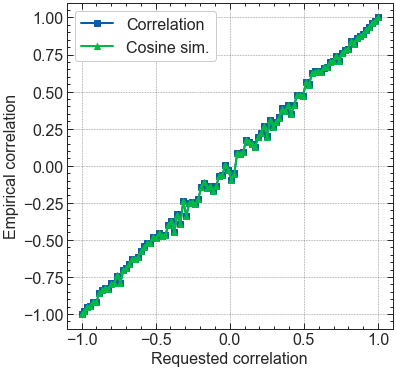

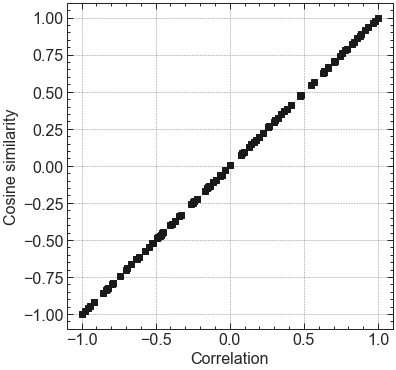

In [15]:
## visualize the results

plt.plot(rs,corrs[:,0],'s-',label='Correlation')
plt.plot(rs,corrs[:,1],'^-',label='Cosine sim.')
plt.legend()
plt.xlabel('Requested correlation')
plt.ylabel('Empirical correlation')
plt.axis('square')
plt.show()


plt.plot(corrs[:,0],corrs[:,1],'ks')
plt.axis('square')
plt.xlabel('Correlation')
plt.ylabel('Cosine similarity')
plt.show()

In [80]:
# their empirical correlation
np.corrcoef(corrs.T)

array([[1.        , 0.99999735],
       [0.99999735, 1.        ]])

# 16. ANOVA

- Analysis of variance: Examine patterns of variance in a dataset
- How much is variance due to this factor?
- To determine the effects of **discrete independent variables** (groups, levels) on a **continuous dependent variable**
- Example: Effects of medication type and age on medication treatment
- Factors (The dimensions of IV's) vs levels (The specific groups or manipulations within each factor)
- One factor with two levels? Yes, you could do ANOVA (overkill). But, T-test is more appropriate because there are two groups to compare

**Randomly assign patients to receive medication A, B, or placebo (fake pills). Measure disease severity after 10 days. Seperate older from younger patients**

- IVs: Medication and age group
- DVs: Disease severity after 10 days

- Factors: Medication, age
- Levels: A, B, placebo; younger, older

In [4]:
index=[['Age group','Age group' ],
      ['Younger', 'Older']]
columns=[['Medication', 'Medication', 'Medication'],
        ['A', 'B', 'Placebo']]
pd.DataFrame(index=index, columns=columns)

#for 3 factors, it will be a cube table

Medication             
                           A    B Placebo
Age group Younger        NaN  NaN     NaN
          Older          NaN  NaN     NaN

- Main effect: One factors influences the DV when ignoring all other factors
- Interactions: The effect of one factor depends on the levels of another factor
- The average DV is differrent from zero. It is usually ignored

- Main efefct: Young people's symptoms improve faster than older people's symptoms, regardless of medicaiton type.
- Interaction: Medication A works better in older people; medication B works better in younger people.
- Intercept: Symptoms improve for almost everyone after 10 days. 

#### Number-way: The number of factors.
- One-way ANOVA: Determine the influence of day-of-week on iPhone purchases ( 1 Factor, 7 levels)
- Two-way ANOVA: Determine the influence of day-of-week and gender (male, female) on iPhone purchases

#### rmANOVA (repeated measures): Taking multiple measurements from the same individual. 
- Research quesiton: Determine the effects of snack type on mood. 
- Experiment: Volunteers eat chocolate for 2 days, potatao chips for 2 days, and candy for 2 days (one way ANOVA: 1 factor, 3 level) 
- DV: Mood
- It is repeated because each individual person in the experiment is going to participate in all of the levels of one factor.

#### Balanced vs unbalanced ANOVA
- Balanced: The same number of data points in each cell.
- Unbalanced: Different number of data points across cells. This could happen of data collection or cleaning. 

In [18]:
data_balanced=20*np.ones((len(index[0]), len(columns[0])))
pd.DataFrame(data=data_balanced, index=index, columns=columns)

Medication              
                           A     B Placebo
Age group Younger       20.0  20.0    20.0
          Older         20.0  20.0    20.0

In [21]:
data_unbalanced=np.random.randint(15, 30, (len(index[0]), len(columns[0])))
pd.DataFrame(data=data_unbalanced, index=index, columns=columns)

Medication            
                           A   B Placebo
Age group Younger         22  23      22
          Older           22  29      28

#### Dummy-coding variables
- Converting categorical variables into numbers.
- The effect of the factor shows the change for the '1' variable compared to the '0' variable
- Exampel: Main effect of gender on lipstick use indicates that women use lipstick more than men (cannot claim anything about men using lipstick independently of women)

#### ANOVA vs MANOVA
- ANOVA: Only one DV (as many IVs as appropriate)
- MANOVA (multivariate ANOVA): Multiple DVs (as many IVs as appropriate)
- MANOVA example: Effects of medication type and age on **Covid-19 symptoms** and **total medical expenses**

#### Fixed vs random effects ANOVAs
- Fixed effects: The number of levels of a factor is fixed (e.g., home type: dorm room, house, apartment)
- Random effects: The levels of a factor are random in the population (e.g., age, slary). Remember this can be discritize (age<50 vs age>50)
- Mixed effects: Fixed + random effects

#### Assumptions of ANOVA
- Independence: To generalize
- Normality: Unexplained variance after fitting the model are normally distributed. The model is not biased in any specific way towards some data points
- Homogeneity of variance (Heteroscedasticity)
- But ANOVA is robust to violations of the asumptions. Non-parametric ANOVA are rarely used and may cause more of headache than they are worth
- Non parametric ANOVA: Kruskal-Wallis=> Only work for one-way ANOVA on rank-transformed data

#### $F$ Statistic
- Hyphothesis testing
$$
H_0:\;\mu_1=\mu_2=...\;=\mu_k\\H_a:\;\mu_i\neq\mu_j
$$
- $H_0$: All groups are statistically indistinguishable
- $H_a$: at least one group is different from the mean of at least one other group
- Sum of squares
$$
SS=\sum_{i=1}^n\left(x_i-\overline x\right)^2
$$
- ANOVA as a partition of sum of squares: The total variation in the dataset is the sum of the variation across individuals within each gropu AND the variation across different levels
- Total SS= Within-group SS + Between-group SS
- Total SS= Error SS + Between-group SS
- $F$ statistic: 'Explained' variance/ 'Unexplained' variance => Due to factors/Natural variation => Between-group/Within-group
- One way ANOVA
$$
{SS}_{Total}=\sum_{j=1}^{levels\;}\sum_{i=1}^{individuals}\left(x_{ij}-\overline x\right)^2;df_{Total}=N-1\\{SS}_{Between}=\sum_{j=1}^{levels\;}\left({\overline x}_j-\overline x\right)^2n_j;df_{Between}=k-1\\{SS}_{Within}=\sum_{j=1}^{levels\;}\sum_{i=1}^{individuals}\left(x_{ij}-{\overline x}_j\right)^2;df_{Within}=N-k
$$
- $F$ Statistic
$$
F_{k-1,\;N-k}=\frac{MS_{Between}}{MS_{Within}}=\frac{\displaystyle\frac{{SS}_{Between}}{df_{Between}}}{\displaystyle\frac{SS_{Within}}{df_{Within}}}\;\;
$$
-'Omnibus' F-test: There is something different. 
-Determining which groups differ requires data visualization follow-up post hoc t-tests. But there is a problem: all possible comparisons (each at p<0.5) leads to (C(levels, 2))0.5 Type 1 error rate
- The solution is **The Tukey test** (q). Tukey test is the most common one.
- Tukey-statistic
$$
q_{j,\;n-j}=\frac{{\overline x}_b-{\overline x}_s}{\sqrt{MS_{Within}}\sqrt{\displaystyle\frac2n}};\;\;j:\#comparisons;\;n:\#total\;data\;values
$$
- Post-hoc comparisons within an ANOVA are allowed only when the oomnibus F-test is significant. 
- Two-way ANOVA produces 3 F-values (Factor A, Factor B, AxB interact). Main effects must be cautiously interpreted with a significant interaction. Data must always be visualized for proper interpretation. 

# 17. One-way ANOVA (independent samples)

### Example 1

In [37]:
ivs=[['Movie Genre']*4, ['Horror', 'Romcom', 'Docum', 'Sci-fi']]
index=['N per group']
pd.DataFrame(data=[[5,5,4,5]],columns=ivs, index=index) #19 participants

Movie Genre                     
                 Horror Romcom Docum. Sci-fi
N per group           5      5      4      5

In [105]:
ivs=[['Movie Genre']*4, ['Horror', 'Romcom', 'Docum', 'Sci-fi']]
index=[['Happiness Rating']*5,['']*5]
df=pd.DataFrame(columns=ivs, index=index)
for i in df.columns:
    if i ==('Movie Genre', 'Docum'):
        df[i]=np.round(np.hstack([np.random.randint(70,80,4) + 2*np.random.randn(4), np.nan]),2)
    else:
        df[i]=np.random.randint(80,101, 5)
df

Movie Genre                     
                       Horror Romcom  Docum Sci-fi
Happiness Rating           90     93  70.83     97
                           82     85  71.00     83
                           97     94  75.83     94
                           98     87  71.70     84
                           81     84    NaN     89

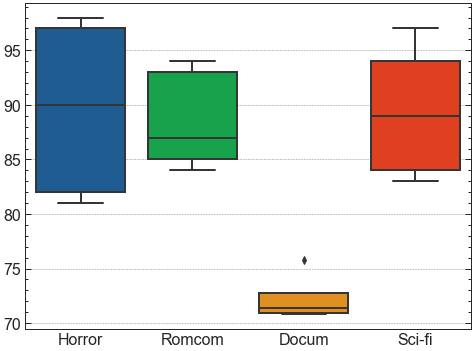

In [123]:
sns.boxplot(data=df)
plt.xticks(list(range(len(df.columns))),[df.columns[i][1] for i in range(len(df.columns))])
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

In [106]:
pd.melt(df)

,variable_0,variable_1,value
0,Movie Genre,Horror,90.00
1,Movie Genre,Horror,82.00
2,Movie Genre,Horror,97.00
3,Movie Genre,Horror,98.00
4,Movie Genre,Horror,81.00
5,Movie Genre,Romcom,93.00
6,Movie Genre,Romcom,85.00
7,Movie Genre,Romcom,94.00
8,Movie Genre,Romcom,87.00
9,Movie Genre,Romcom,84.00


In [147]:
anova_result=pg.anova(dv='value', between='variable_1', data=pd.melt(df),detailed=True)
anova_result

,Source,SS,DF,MS,F,p-unc,np2
0,variable_1,900.462,3,300.154,8.858,0.001279,0.639
1,Within,508.265,15,33.884,-,-,-


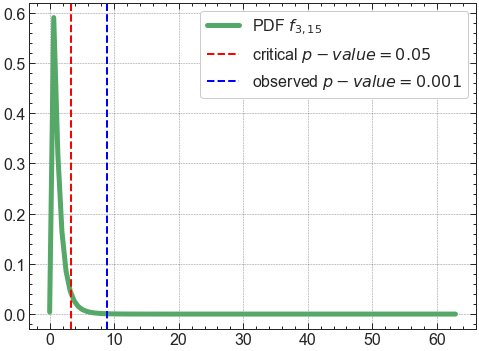

In [154]:
dfn=len(df.columns) -1 #4-1
dfd=sum(np.sum(df>0))-len(df.columns) #19-4
x = np.linspace(stats.f.ppf(0.00000001, dfn, dfd),
                stats.f.ppf(0.99999999, dfn, dfd), 100)
plt.plot(x, stats.f.pdf(x, dfn, dfd),'g-', lw=5, label='PDF $f_{%g,%g}$'%(dfn,dfd))
plt.axvline(stats.f.ppf(1-0.05, dfn, dfd), lw=2,color='red',
            ls='--', label='critical $p-value=0.05$')
plt.axvline(stats.f.ppf(1-anova_result['p-unc'][0], dfn, dfd), 
            lw=2, ls='--',color='blue',
            label='observed $p-value=%g$'%(np.round(anova_result['p-unc'][0],3)))
plt.legend();

In [155]:
tukey_result=pg.pairwise_tukey(dv='value', between='variable_1', data=pd.melt(df))
tukey_result

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,Docum,Horror,72.34,89.6,-17.26,3.905,two-sided,-4.420,0.001,-2.636
1,Docum,Romcom,72.34,88.6,-16.26,3.905,two-sided,-4.164,0.001,-2.483
2,Docum,Sci-fi,72.34,89.4,-17.06,3.905,two-sided,-4.369,0.001,-2.605
3,Horror,Romcom,89.60,88.6,1.00,3.682,two-sided,0.272,0.900,0.155
4,Horror,Sci-fi,89.60,89.4,0.20,3.682,two-sided,0.054,0.900,0.031
5,Romcom,Sci-fi,88.60,89.4,-0.80,3.682,two-sided,-0.217,0.900,-0.124


### Example 2

In [157]:
## data parameters

# group means
mean1 = 4
mean2 = 3.8
mean3 = 7

# samples per group
N1 = 30
N2 = 35
N3 = 29

# standard deviation (assume common across groups)
stdev = 2

In [158]:
## now to simulate the data
data1 = mean1 + np.random.randn(N1)*stdev
data2 = mean2 + np.random.randn(N2)*stdev
data3 = mean3 + np.random.randn(N3)*stdev

datacolumn = np.hstack((data1,data2,data3))

# group labels
groups = ['1']*N1 + ['2']*N2 + ['3']*N3

# convert to a pandas dataframe
df = pd.DataFrame({'TheData':datacolumn,'Group':groups})
df

,TheData,Group
0,-2.162614,1
1,4.443859,1
2,2.629538,1
3,3.147652,1
4,6.029764,1
...,...,...
89,4.677987,3
90,4.458576,3
91,7.943859,3
92,4.848644,3


In [159]:
pg.anova(data=df,dv='TheData',between='Group')

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,91,31.856,3.258764e-11,0.412


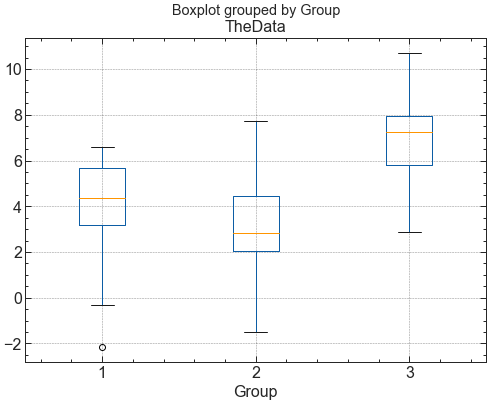

In [160]:
df.boxplot('TheData',by='Group');

In [161]:
pg.pairwise_tukey(data=df,dv='TheData',between='Group')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,1,2,4.083,3.146,0.937,0.494,two-sided,1.898,0.140369,0.467
1,1,3,4.083,7.014,-2.931,0.517,two-sided,-5.671,0.001000,-1.457
2,2,3,3.146,7.014,-3.868,0.498,two-sided,-7.762,0.001000,-1.925


# 18. One-way repeated-measures ANOVA

In [162]:
## data parameters

# group means
mean1 = 4
mean2 = 3.8
mean3 = 7

# samples (same across group)
N = 30

# standard deviation (assume common across groups)
stdev = 2

In [163]:
## now to simulate the data
data1 = mean1 + np.random.randn(N)*stdev
data2 = mean2 + np.random.randn(N)*stdev
data3 = mean3 + np.random.randn(N)*stdev

datamat = np.vstack((data1,data2,data3)).T

# convert to a pandas dataframe
df = pd.DataFrame(data=datamat,columns=['d1','d2','d3'])
df

,d1,d2,d3
0,4.212462,2.926754,7.967494
1,4.292326,3.108834,7.356605
2,0.324065,2.720972,9.183802
3,5.264616,4.462236,7.135185
4,5.846038,0.810989,5.989801
5,5.107458,3.695934,10.180149
6,4.145133,4.362680,4.658348
7,3.425266,3.714950,6.878694
8,0.830570,3.985710,5.603637
9,8.426189,4.882329,8.690368


In [164]:
pg.rm_anova(data=df,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Within,241.599,2,120.800,28.861,0.0,0.499,0.959
1,Error,242.766,58,4.186,-,-,-,-


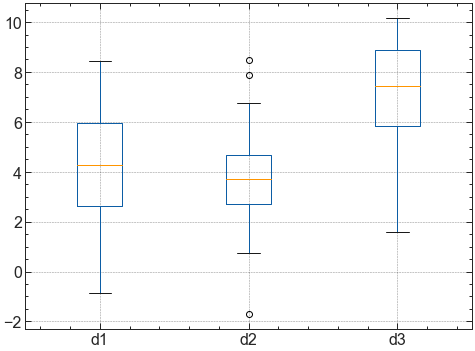

In [165]:
df.boxplot();


In [89]:
## example from SPSS website

# https://www.spss-tutorials.com/repeated-measures-anova/

data = [
    [8, 7, 6, 7],
    [5, 8, 5, 6],
    [6, 5, 3, 4],
    [6, 6, 7, 3],
    [8, 10, 8, 6],
    [6, 5, 6, 3],
    [6, 5, 2, 3],
    [9, 9, 9, 6],
    [5, 4, 3, 7],
    [7, 6, 6, 5]]


df = pd.DataFrame(data=data,columns=['1','2','3','4'])

pg.rm_anova(data=df,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Within,18.2,3,6.067,3.616,0.025787,0.287,0.697
1,Error,45.3,27,1.678,-,-,-,-


# 19. Two-way mixed-effects ANOVA

In [168]:
## the data and group labels

data = np.loadtxt(open("TwoWayMixedANOVA_data.csv"),delimiter=",")

timepoint = ['1']*45 + ['2']*45 + ['3']*45
groups    = ['1']*15 + ['2']*15 + ['3']*15
s = []
for i in range(45):
    s += [str(i)]

# # convert to pandas
df = pd.DataFrame(data=np.matrix.flatten(data,'F'),columns=['TheData'])
df['Group'] = np.tile(groups,3)
df['TimePoint'] = timepoint
df['Subject'] = np.tile(s,3)

pd.set_option("display.max_rows", None, "display.max_columns", None)
df.tail()

,TheData,Group,TimePoint,Subject
130,16.0,3,3,40
131,14.0,3,3,41
132,15.0,3,3,42
133,15.0,3,3,43
134,18.0,3,3,44


In [175]:
pg.mixed_anova(data=df,dv='TheData',between='Group',within='TimePoint',subject='Subject')

C:\Users\Kevin\anaconda3\lib\site-packages\pingouin\parametric.py:1464: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aov = aov.append({'Source': 'Interaction',


,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,40.311,2,42,20.156,2.447,9.880408e-02,0.104,-
1,TimePoint,69.644,2,84,34.822,31.147,7.588978e-11,0.426,0.902
2,Interaction,57.778,4,84,14.445,12.920,3.050336e-08,0.381,-


<AxesSubplot:xlabel='TimePoint', ylabel='TheData'>

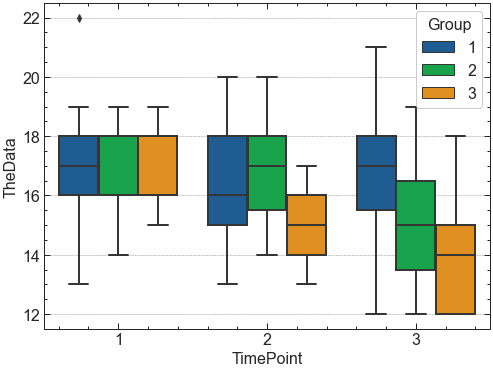

In [170]:
sns.boxplot(data=df,hue="Group",y="TheData",x='TimePoint')
